In [2]:
import tensorflow.keras as keras
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
%matplotlib inline

## МNIST

In [3]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

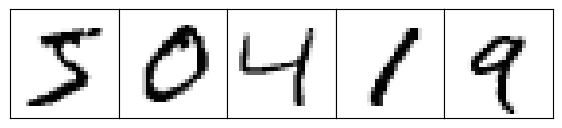

In [14]:
fig, ax = plt.subplots(1, 5, figsize=(7, 3))
fig.subplots_adjust(hspace=0, wspace=0)
cnt = 0

for i in range(5):
        ax[i].xaxis.set_major_locator(plt.NullLocator())
        ax[i].yaxis.set_major_locator(plt.NullLocator())
        ax[i].imshow(mnist_train_images[cnt], cmap='Greys')
        cnt += 1
fig.savefig('MNIST_data.png', format='png')

In [4]:
mnist_train_cat = keras.utils.to_categorical(mnist_train_labels, 10)
mnist_test_cat = keras.utils.to_categorical(mnist_test_labels, 10)

## Преобразование Собеля

In [5]:
input_image = keras.Input([28, 28, 1])

# Свёрточный слой
conv = keras.layers.Conv2D(
    2,
    [3, 3],
    use_bias=False,
)(input_image) # применяем ко входному изображению

sobel_filter_model = keras.Model(inputs=[input_image], outputs=conv)

weights = np.asarray(
    [[
      [[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]],
     
      [[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]],
    ]])

weights = np.transpose(weights, [3, 2, 0, 1])

sobel_filter_model.layers[1].set_weights([weights])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


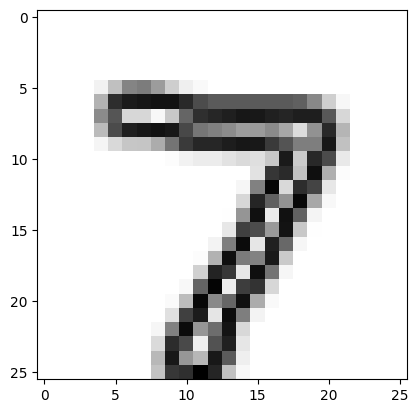

In [6]:
two_dim_sobel = sobel_filter_model.predict(mnist_test_images)
sobel_g_images_test = np.sqrt(two_dim_sobel[:, :, :, 0] ** 2 + two_dim_sobel[:, :, :, 1] ** 2)
plt.imshow(sobel_g_images_test[0], cmap='Greys')

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


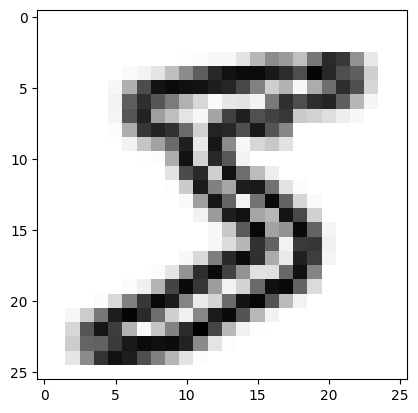

In [9]:
two_dim_sobel = sobel_filter_model.predict(mnist_train_images)
sobel_g_images_train = np.sqrt(two_dim_sobel[:, :, :, 0] ** 2 + two_dim_sobel[:, :, :, 1] ** 2)
plt.imshow(sobel_g_images_train[0], cmap='Greys')

In [10]:
sobel_g_images_test_norm = np.zeros_like(sobel_g_images_test)


for i in range(len(sobel_g_images_test_norm)):
    sobel_g_images_test_norm[i] = (sobel_g_images_test[i] - sobel_g_images_test[i].min()) / \
    (sobel_g_images_test[i].max()- sobel_g_images_test[i].min())

In [11]:
sobel_g_images_train_norm = np.zeros_like(sobel_g_images_train)

for i in range(len(sobel_g_images_train_norm)):
    sobel_g_images_train_norm[i] = (sobel_g_images_train[i] - sobel_g_images_train[i].min()) / \
                                            (sobel_g_images_train[i].max()- sobel_g_images_train[i].min())
        
sobel_g_images_train_norm.shape

(60000, 26, 26)

## Преообразование Хаара

In [12]:
def get_haar_matrix(n:int):
    l = 2 ** int(np.ceil(np.log2(n)))
    m = np.zeros((l,l))
    j = 0
    sq = np.sqrt(0.5)
    for i in range(0, l//2):
        m[i][j] = sq
        m[i][j + 1] = sq
        m[i+l//2][j] = sq
        m[i+l//2][j + 1] = -sq
        j += 2
    return m

In [30]:
mnist_train_images[0].shape

(28, 28)

In [13]:
def haar_filter(x:np.ndarray, m:np.ndarray):
    image = np.pad(x, ([0,len(m) - len(x)],[0,len(m) - len(x)]), mode='constant')
    for s in image:
        np.matmul(s, m, out=s)
    image[np.abs(image) < 0.5] = 0
    m_r = np.transpose(m)
    for s in image:
        np.matmul(s, m_r, out=s)
    return image[:len(x),:len(x)]

In [14]:
def haar_transform(x:np.ndarray, m:np.ndarray):
    image = np.pad(x, ([0,len(m) - len(x)],[0,len(m) - len(x)]), mode='constant')
    for s in image:
        np.matmul(s, m, out=s)
    return image[:len(x),:len(x)]

In [264]:
haar_filtered_images_test = np.zeros_like(sobel_g_images_test_norm)
m = get_haar_matrix(len(haar_filtered_images_test[0]))
for i in range(len(haar_filtered_images_test)):
    haar_filtered_images_test[i] = haar_filter(sobel_g_images_test_norm[i], m)

In [265]:
haar_filtered_images_train = np.zeros_like(sobel_g_images_train_norm)
m = get_haar_matrix(len(haar_filtered_images_train[0]))
for i in range(len(haar_filtered_images_train)):
    haar_filtered_images_train[i] = haar_filter(sobel_g_images_train_norm[i], m)

## Визуализации

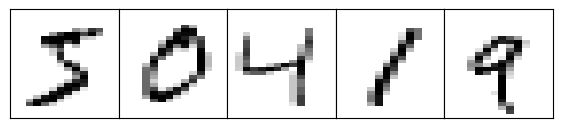

In [96]:
m = get_haar_matrix(len(mnist_train_norm[0]))
mnist_train_norm = mnist_train_images / 255
mnist_test_norm = mnist_test_images / 255
haar_filtered_images = np.zeros_like(mnist_train_norm)
for i in range(5):
    haar_filtered_images[i] = haar_filter_2(mnist_train_norm[i], m)


fig, ax = plt.subplots(1, 5, figsize=(7, 3))
fig.subplots_adjust(hspace=0, wspace=0)
cnt = 0

for i in range(5):
        ax[i].xaxis.set_major_locator(plt.NullLocator())
        ax[i].yaxis.set_major_locator(plt.NullLocator())
        ax[i].imshow(haar_filtered_images[cnt], cmap='Greys')
        cnt += 1

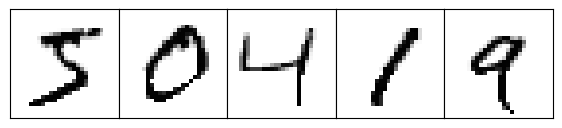

In [123]:
m = get_haar_matrix(len(mnist_train_norm[0]))
mnist_train_norm = mnist_train_images / 255
mnist_test_norm = mnist_test_images / 255
haar_filtered_images = np.zeros_like(mnist_train_norm)
for i in range(5):
    haar_filtered_images[i] = haar_filter(mnist_train_norm[i], m)


fig, ax = plt.subplots(1, 5, figsize=(7, 3))
fig.subplots_adjust(hspace=0, wspace=0)
cnt = 0

for i in range(5):
        ax[i].xaxis.set_major_locator(plt.NullLocator())
        ax[i].yaxis.set_major_locator(plt.NullLocator())
        ax[i].imshow(haar_filtered_images[cnt], cmap='Greys')
        cnt += 1
fig.savefig('haar_filtered.png', format='png')

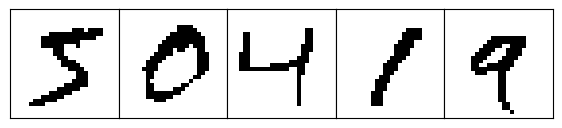

In [89]:
m = get_haar_matrix(len(mnist_train_norm[0]))
mnist_train_norm = mnist_train_images / 255
mnist_test_norm = mnist_test_images / 255
discrete_images = np.zeros_like(mnist_train_norm)
for i in range(5):
    discrete_images[i] = haar_filter(mnist_train_norm[i], m)
discrete_images[discrete_images > 0.2] = 1
discrete_images[discrete_images <= 0.2] = 0

fig, ax = plt.subplots(1, 5, figsize=(7, 3))
fig.subplots_adjust(hspace=0, wspace=0)
cnt = 0

for i in range(5):
        ax[i].xaxis.set_major_locator(plt.NullLocator())
        ax[i].yaxis.set_major_locator(plt.NullLocator())
        ax[i].imshow(discrete_images[cnt], cmap='Greys')
        cnt += 1
fig.savefig('discrete.png', format='png')

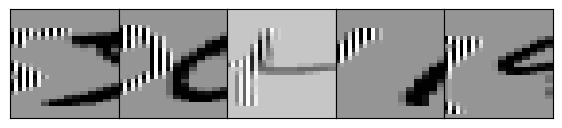

In [33]:
m = get_haar_matrix(len(mnist_train_norm[0]))
mnist_train_norm = mnist_train_images / 255
mnist_test_norm = mnist_test_images / 255
transfrom_images = np.zeros_like(mnist_train_norm)
for i in range(5):
    transfrom_images[i] = haar_transform(mnist_train_norm[i], m)


fig, ax = plt.subplots(1, 5, figsize=(7, 3))
fig.subplots_adjust(hspace=0, wspace=0)
cnt = 0

for i in range(5):
        ax[i].xaxis.set_major_locator(plt.NullLocator())
        ax[i].yaxis.set_major_locator(plt.NullLocator())
        ax[i].imshow(transfrom_images[cnt], cmap='Greys')
        cnt += 1
fig.savefig('wavelets_transform.png', format='png')

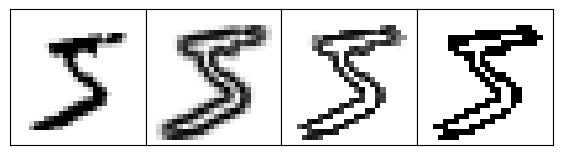

In [124]:
haar_filtered_discrete_sobel =  haar_filtered_images_train[0].copy()
haar_filtered_discrete_sobel[haar_filtered_discrete_sobel > 0.2] = 1
haar_filtered_discrete_sobel[haar_filtered_discrete_sobel <= 0.2] = 0

l = [mnist_train_norm[0]
    , sobel_g_images_train_norm[0]
    , haar_filtered_images_train[0]
    , haar_filtered_discrete_sobel]


fig, ax = plt.subplots(1, len(l), figsize=(7, 3))
fig.subplots_adjust(hspace=0, wspace=0)
cnt = 0

for i in range(len(l)):
        ax[i].xaxis.set_major_locator(plt.NullLocator())
        ax[i].yaxis.set_major_locator(plt.NullLocator())
        ax[i].imshow(l[cnt], cmap='Greys', label='a')
        cnt += 1
fig.savefig('sobel.png', format='png')

TypeError: cannot unpack non-iterable AxesImage object

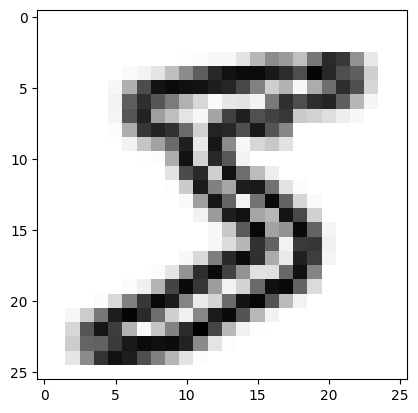

In [101]:
ax = plt.imshow(sobel_g_images_train_norm[0], cmap='Greys')
fig.savefig('sobel.png', format='png')

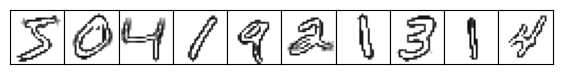

In [261]:
fig, ax = plt.subplots(1, 10, figsize=(7, 3))
fig.subplots_adjust(hspace=0, wspace=0)
cnt = 0

for i in range(10):
        ax[i].xaxis.set_major_locator(plt.NullLocator())
        ax[i].yaxis.set_major_locator(plt.NullLocator())
        ax[i].imshow(haar_filtered_images_train[cnt], cmap='Greys')
        cnt += 1

## Обучение на обычных изображениях

In [33]:
mnist_train_norm = mnist_train_images / 255
mnist_test_norm = mnist_test_images / 255

In [272]:
%%timeit
model_norm = keras.Sequential([Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_norm.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_norm.fit(mnist_train_norm, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8656 - loss: 0.4776 - val_accuracy: 0.9570 - val_loss: 0.1524
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9582 - loss: 0.1432 - val_accuracy: 0.9661 - val_loss: 0.1148
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9730 - loss: 0.0919 - val_accuracy: 0.9692 - val_loss: 0.1038
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9791 - loss: 0.0673 - val_accuracy: 0.9736 - val_loss: 0.0879
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9859 - loss: 0.0469 - val_accuracy: 0.9719 - val_loss: 0.0927
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8602 - loss: 0.4899 - val_accuracy: 0.9531 - val_loss: 0.1617
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9583 - loss: 0.1415 - val_accuracy: 0.9657 - val_loss: 0.1172
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9738 - loss: 0.0914 - val_ac

In [273]:
%timeit model_norm.evaluate(mnist_test_norm, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9770 - loss: 0.1437
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9770 - loss: 0.1437
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9770 - loss: 0.1437
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9770 - loss: 0.1437
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9770 - loss: 0.1437
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9770 - loss: 0.1437
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9770 - loss: 0.1437
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9770 - loss: 0.1437
877 ms ± 55.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [274]:
%%timeit

model_CNN_norm = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

model_CNN_norm.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_CNN_norm.fit(mnist_train_norm, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.9098 - loss: 0.3016 - val_accuracy: 0.9798 - val_loss: 0.0648
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9866 - loss: 0.0433 - val_accuracy: 0.9877 - val_loss: 0.0451
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.9918 - loss: 0.0270 - val_accuracy: 0.9908 - val_loss: 0.0315
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.9938 - loss: 0.0200 - val_accuracy: 0.9902 - val_loss: 0.0352
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9959 - loss: 0.0133 - val_accuracy: 0.9865 - val_loss: 0.0501
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.9055 - loss: 0.3098 - val_accuracy: 0.9839 - val_loss: 0.0521
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.9856 - loss: 0.0461 - val_accuracy: 0.9834 - val_loss: 0.0551
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.9901 - loss: 0

In [275]:
%timeit model_CNN_norm.evaluate(mnist_test_norm, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9914 - loss: 0.0596
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9914 - loss: 0.0596
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9914 - loss: 0.0596
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9914 - loss: 0.0596
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9914 - loss: 0.0596
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9914 - loss: 0.0596
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9914 - loss: 0.0596
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9914 - loss: 0.0596
3.15 s ± 303 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Обучение на контурах после преобразования Собеля

In [136]:
model_by_sobel = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_sobel.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

%timeit model_by_sobel.fit(sobel_g_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5604 - loss: 41.3770 - val_accuracy: 0.5100 - val_loss: 1.4849
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5578 - loss: 1.4031 - val_accuracy: 0.5979 - val_loss: 1.3595
Epoch 3/5


KeyboardInterrupt: 

In [ ]:
%timeit model_by_sobel.evaluate(sobel_g_images_test, mnist_test_cat)

In [234]:
sobel_g_images_train_norm = sobel_g_images_train.copy()
sobel_g_images_test_norm = sobel_g_images_test.copy()

for image in sobel_g_images_train_norm:
    image /= np.max(image)
for image in sobel_g_images_test_norm:
    image /= np.max(image)


model_by_sobel_norm = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_sobel_norm.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

%timeit model_by_sobel_norm.fit(sobel_g_images_train_norm, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8216 - loss: 0.5902 - val_accuracy: 0.9190 - val_loss: 0.2605
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9284 - loss: 0.2300 - val_accuracy: 0.9372 - val_loss: 0.2014
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9518 - loss: 0.1573 - val_accuracy: 0.9477 - val_loss: 0.1672
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9623 - loss: 0.1179 - val_accuracy: 0.9498 - val_loss: 0.1546
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9717 - loss: 0.0903 - val_accuracy: 0.9570 - val_loss: 0.1410
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9764 - loss: 0.0757 - val_accuracy: 0.9546 - val_loss: 0.1435
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9796 - loss: 0.0619 - val_accuracy: 0.9587 - val_loss: 0.1399
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9853 - loss: 0.0478 - val_acc

In [235]:
%timeit model_by_sobel_norm.evaluate(sobel_g_images_test_norm, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9565 - loss: 0.2691
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9565 - loss: 0.2691
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9565 - loss: 0.2691
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9565 - loss: 0.2691
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9565 - loss: 0.2691
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9565 - loss: 0.2691
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9565 - loss: 0.2691
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9565 - loss: 0.2691
1.15 s ± 178 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [27]:
CNN_by_sobel = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

CNN_by_sobel.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

CNN_by_sobel.fit(sobel_g_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [29]:
CNN_by_sobel.evaluate(sobel_g_images_test, mnist_test_cat)

313/313 [==============================] - 3s 7ms/step - loss: 0.0724 - accuracy: 0.9792


[0.07243413478136063, 0.979200005531311]

In [236]:
CNN_by_sobel_norm = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

CNN_by_sobel_norm.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

%timeit CNN_by_sobel_norm.fit(sobel_g_images_train_norm, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.8832 - loss: 0.3752 - val_accuracy: 0.9780 - val_loss: 0.0713
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 25ms/step - accuracy: 0.9821 - loss: 0.0557 - val_accuracy: 0.9780 - val_loss: 0.0726
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.9875 - loss: 0.0389 - val_accuracy: 0.9860 - val_loss: 0.0480
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.9907 - loss: 0.0281 - val_accuracy: 0.9855 - val_loss: 0.0493
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.9945 - loss: 0.0160 - val_accuracy: 0.9884 - val_loss: 0.0422
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.9954 - loss: 0.0129 - val_accuracy: 0.9863 - val_loss: 0.0549
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.9964 - loss: 0.0108 - val_accuracy: 0.9844 - val_loss: 0.0592
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.9967 - loss: 0

In [237]:
%timeit CNN_by_sobel_norm.evaluate(sobel_g_images_test_norm, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9900 - loss: 0.0741
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9900 - loss: 0.0741
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9900 - loss: 0.0741
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9900 - loss: 0.0741
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9900 - loss: 0.0741
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9900 - loss: 0.0741
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9900 - loss: 0.0741
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9900 - loss: 0.0741
3.35 s ± 221 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [141]:
cut_sobel_train_image = np.copy(sobel_g_images_train_norm)
cut_sobel_test_image = np.copy(sobel_g_images_test_norm)

for i in range(len(cut_sobel_test_image)):
    cut_sobel_test_image[i, cut_sobel_test_image[i] < 0.5] = 0

for i in range(len(cut_sobel_train_image)):
    cut_sobel_train_image[i, cut_sobel_train_image[i] < 0.5] = 0

In [142]:
cut_model_by_sobel = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

cut_model_by_sobel.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

%timeit cut_model_by_sobel.fit(cut_sobel_train_image, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8295 - loss: 0.5477 - val_accuracy: 0.9323 - val_loss: 0.2202
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9396 - loss: 0.1913 - val_accuracy: 0.9441 - val_loss: 0.1778
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9608 - loss: 0.1251 - val_accuracy: 0.9463 - val_loss: 0.1880
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9669 - loss: 0.0986 - val_accuracy: 0.9486 - val_loss: 0.1649
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9744 - loss: 0.0751 - val_accuracy: 0.9563 - val_loss: 0.1577
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9793 - loss: 0.0644 - val_accuracy: 0.9538 - val_loss: 0.1650
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9825 - loss: 0.0521 - val_accuracy: 0.9558 - val_loss: 0.1752
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9861 - loss: 0.0403 - val_acc

In [143]:
%timeit cut_model_by_sobel.evaluate(cut_sobel_test_image, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9577 - loss: 0.4099
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9577 - loss: 0.4099
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9577 - loss: 0.4099
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9577 - loss: 0.4099
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9577 - loss: 0.4099
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9577 - loss: 0.4099
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9577 - loss: 0.4099
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9577 - loss: 0.4099
767 ms ± 123 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [144]:
CNN_by_sobel_cut = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

CNN_by_sobel_cut.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

%timeit CNN_by_sobel_cut.fit(cut_sobel_train_image, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.9008 - loss: 0.3085 - val_accuracy: 0.9819 - val_loss: 0.0586
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.9845 - loss: 0.0491 - val_accuracy: 0.9864 - val_loss: 0.0459
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.9907 - loss: 0.0299 - val_accuracy: 0.9863 - val_loss: 0.0450
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9937 - loss: 0.0197 - val_accuracy: 0.9874 - val_loss: 0.0412
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9951 - loss: 0.0144 - val_accuracy: 0.9873 - val_loss: 0.0501
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.9961 - loss: 0.0113 - val_accuracy: 0.9880 - val_loss: 0.0468
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9973 - loss: 0.0076 - val_accuracy: 0.9852 - val_loss: 0.0603
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.9972 - loss: 0

In [145]:
%timeit CNN_by_sobel_cut.evaluate(cut_sobel_test_image, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9848 - loss: 0.1486
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9848 - loss: 0.1486
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9848 - loss: 0.1486
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9848 - loss: 0.1486
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9848 - loss: 0.1486
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9848 - loss: 0.1486
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9848 - loss: 0.1486
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9848 - loss: 0.1486
2.16 s ± 123 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Обучение после фильтров Хаара и Собелея

## Обучение после преобазования Хаара 

In [ ]:
haar_filtered_images_test = np.zeros_like(sobel_g_images_test_norm)
m = get_haar_matrix(len(haar_filtered_images_test[0]))
for i in range(len(haar_filtered_images_test)):
    haar_filtered_images_test[i] = haar_filter(sobel_g_images_test_norm[i], m)

In [ ]:
haar_filtered_images_train = np.zeros_like(sobel_g_images_train_norm)
m = get_haar_matrix(len(haar_filtered_images_train[0]))
for i in range(len(haar_filtered_images_train)):
    haar_filtered_images_train[i] = haar_filter(sobel_g_images_train_norm[i], m)

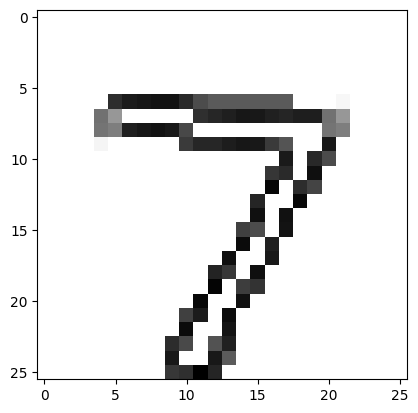

In [267]:
plt.imshow(haar_filtered_images_train[0], cmap='Greys')

In [276]:
%%timeit 

model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7819 - loss: 0.7102 - val_accuracy: 0.8999 - val_loss: 0.3187
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9109 - loss: 0.2854 - val_accuracy: 0.9272 - val_loss: 0.2410
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9434 - loss: 0.1843 - val_accuracy: 0.9320 - val_loss: 0.2134
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9623 - loss: 0.1295 - val_accuracy: 0.9396 - val_loss: 0.2032
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9738 - loss: 0.0916 - val_accuracy: 0.9402 - val_loss: 0.2013
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7823 - loss: 0.7055 - val_accuracy: 0.9038 - val_loss: 0.3148
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9140 - loss: 0.2773 - val_accuracy: 0.9238 - val_loss: 0.2488
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9446 - loss: 0.1849 - val_a

In [277]:
%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9320 - loss: 0.5367
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9320 - loss: 0.5367
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9320 - loss: 0.5367
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9320 - loss: 0.5367
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9320 - loss: 0.5367
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9320 - loss: 0.5367
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9320 - loss: 0.5367
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9320 - loss: 0.5367
958 ms ± 98.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [278]:
%%timeit 

CNN_by_haar_filter = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

CNN_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

CNN_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.8735 - loss: 0.3873 - val_accuracy: 0.9789 - val_loss: 0.0689
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9789 - loss: 0.0650 - val_accuracy: 0.9765 - val_loss: 0.0756
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.9864 - loss: 0.0418 - val_accuracy: 0.9822 - val_loss: 0.0562
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.9915 - loss: 0.0264 - val_accuracy: 0.9851 - val_loss: 0.0508
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9944 - loss: 0.0171 - val_accuracy: 0.9827 - val_loss: 0.0594
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.8745 - loss: 0.3815 - val_accuracy: 0.9765 - val_loss: 0.0751
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9795 - loss: 0.0654 - val_accuracy: 0.9846 - val_loss: 0.0515
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.9881 - loss: 0

In [279]:
%timeit CNN_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9819 - loss: 0.1512
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9819 - loss: 0.1512
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9819 - loss: 0.1512
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9819 - loss: 0.1512
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9819 - loss: 0.1512
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9819 - loss: 0.1512
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9819 - loss: 0.1512
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9819 - loss: 0.1512
3.52 s ± 183 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Два интервала

In [282]:
two_intervals_bounds = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
counter = 0

In [283]:
bound = two_intervals_bounds[counter]
discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound] = 1
discrete_haar_train[discrete_haar_train <= bound] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound] = 1
discrete_haar_test[discrete_haar_test <= bound] = 0

counter += 1

In [284]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5


C:\Users\boris\anaconda3\envs\Wavelets\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7801 - loss: 0.7082 - val_accuracy: 0.8965 - val_loss: 0.3248
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9139 - loss: 0.2789 - val_accuracy: 0.9172 - val_loss: 0.2635
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9411 - loss: 0.1896 - val_accuracy: 0.9283 - val_loss: 0.2294
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9603 - loss: 0.1305 - val_accuracy: 0.9326 - val_loss: 0.2240
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9735 - loss: 0.0932 - val_accuracy: 0.9332 - val_loss: 0.2215
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7858 - loss: 0.6971 - val_accuracy: 0.9067 - val_loss: 0.3057
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9176 - loss: 0.2677 - val_accuracy: 0.9220 - val_loss: 0.2511
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9436 - loss: 0.1821 - val_accuracy: 

In [285]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9218 - loss: 0.6298
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9218 - loss: 0.6298
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9218 - loss: 0.6298
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9218 - loss: 0.6298
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9218 - loss: 0.6298
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9218 - loss: 0.6298
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9218 - loss: 0.6298
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9218 - loss: 0.6298
965 ms ± 151 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [286]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5


C:\Users\boris\anaconda3\envs\Wavelets\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.8825 - loss: 0.3682 - val_accuracy: 0.9754 - val_loss: 0.0790
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.9792 - loss: 0.0645 - val_accuracy: 0.9798 - val_loss: 0.0626
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.9859 - loss: 0.0429 - val_accuracy: 0.9836 - val_loss: 0.0549
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 24ms/step - accuracy: 0.9915 - loss: 0.0261 - val_accuracy: 0.9808 - val_loss: 0.0594
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9944 - loss: 0.0180 - val_accuracy: 0.9852 - val_loss: 0.0495
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.8720 - loss: 0.4018 - val_accuracy: 0.9775 - val_loss: 0.0694
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9792 - loss: 0.0662 - val_accuracy: 0.9798 - val_loss: 0.0645
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9866 - loss: 0.0413 - va

In [287]:
%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9829 - loss: 0.0933
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9829 - loss: 0.0933
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9829 - loss: 0.0933
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9829 - loss: 0.0933
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9829 - loss: 0.0933
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9829 - loss: 0.0933
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9829 - loss: 0.0933
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9829 - loss: 0.0933
2.73 s ± 343 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [288]:
bound = two_intervals_bounds[counter]
discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound] = 1
discrete_haar_train[discrete_haar_train <= bound] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound] = 1
discrete_haar_test[discrete_haar_test <= bound] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!0.1!!!!!!!!!!!


In [289]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7884 - loss: 0.6922 - val_accuracy: 0.8992 - val_loss: 0.3260
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9125 - loss: 0.2828 - val_accuracy: 0.9194 - val_loss: 0.2619
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9393 - loss: 0.1935 - val_accuracy: 0.9276 - val_loss: 0.2359
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9604 - loss: 0.1318 - val_accuracy: 0.9333 - val_loss: 0.2173
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9743 - loss: 0.0889 - val_accuracy: 0.9337 - val_loss: 0.2227
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7797 - loss: 0.7055 - val_accuracy: 0.9006 - val_loss: 0.3209
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9152 - loss: 0.2764 - val_accuracy: 0.9225 - val_loss: 0.2490
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9448 - loss: 0.1814 - val_acc

In [290]:
%timeit model_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9230 - loss: 0.6235
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9230 - loss: 0.6235
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9230 - loss: 0.6235
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9230 - loss: 0.6235
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9230 - loss: 0.6235
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9230 - loss: 0.6235
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9230 - loss: 0.6235
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9230 - loss: 0.6235
919 ms ± 98 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [291]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.8745 - loss: 0.4008 - val_accuracy: 0.9778 - val_loss: 0.0721
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9795 - loss: 0.0659 - val_accuracy: 0.9811 - val_loss: 0.0584
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9864 - loss: 0.0418 - val_accuracy: 0.9798 - val_loss: 0.0686
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9908 - loss: 0.0260 - val_accuracy: 0.9836 - val_loss: 0.0588
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.9941 - loss: 0.0171 - val_accuracy: 0.9830 - val_loss: 0.0617
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.8729 - loss: 0.3886 - val_accuracy: 0.9689 - val_loss: 0.0979
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9794 - loss: 0.0673 - val_accuracy: 0.9777 - val_loss: 0.0713
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.9878 - loss: 0

In [292]:
%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9832 - loss: 0.0918
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9832 - loss: 0.0918
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9832 - loss: 0.0918
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9832 - loss: 0.0918
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9832 - loss: 0.0918
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9832 - loss: 0.0918
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9832 - loss: 0.0918
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9832 - loss: 0.0918
2.7 s ± 168 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [293]:
bound = two_intervals_bounds[counter]
discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound] = 1
discrete_haar_train[discrete_haar_train <= bound] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound] = 1
discrete_haar_test[discrete_haar_test <= bound] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!0.2!!!!!!!!!!!


In [294]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7761 - loss: 0.7187 - val_accuracy: 0.9053 - val_loss: 0.3069
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9093 - loss: 0.2824 - val_accuracy: 0.9246 - val_loss: 0.2444
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9428 - loss: 0.1858 - val_accuracy: 0.9298 - val_loss: 0.2298
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9596 - loss: 0.1352 - val_accuracy: 0.9357 - val_loss: 0.2160
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9737 - loss: 0.0918 - val_accuracy: 0.9355 - val_loss: 0.2201
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7806 - loss: 0.7115 - val_accuracy: 0.8996 - val_loss: 0.3221
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9137 - loss: 0.2773 - val_accuracy: 0.9210 - val_loss: 0.2511
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9435 - loss: 0.1885 - val_accu

In [295]:
%timeit model_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9238 - loss: 0.6132
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9238 - loss: 0.6132
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9238 - loss: 0.6132
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9238 - loss: 0.6132
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9238 - loss: 0.6132
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9238 - loss: 0.6132
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9238 - loss: 0.6132
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9238 - loss: 0.6132
977 ms ± 38.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [296]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.8754 - loss: 0.3842 - val_accuracy: 0.9789 - val_loss: 0.0721
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.9796 - loss: 0.0665 - val_accuracy: 0.9763 - val_loss: 0.0815
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 77s 24ms/step - accuracy: 0.9869 - loss: 0.0419 - val_accuracy: 0.9812 - val_loss: 0.0563
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9921 - loss: 0.0244 - val_accuracy: 0.9812 - val_loss: 0.0592
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9947 - loss: 0.0158 - val_accuracy: 0.9849 - val_loss: 0.0589
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.8758 - loss: 0.3953 - val_accuracy: 0.9774 - val_loss: 0.0759
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9783 - loss: 0.0673 - val_accuracy: 0.9797 - val_loss: 0.0661
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.9878 - loss: 0

In [297]:
%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9828 - loss: 0.0918
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9828 - loss: 0.0918
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9828 - loss: 0.0918
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9828 - loss: 0.0918
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9828 - loss: 0.0918
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9828 - loss: 0.0918
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9828 - loss: 0.0918
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9828 - loss: 0.0918
2.98 s ± 298 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [298]:
bound = two_intervals_bounds[counter]
discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound] = 1
discrete_haar_train[discrete_haar_train <= bound] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound] = 1
discrete_haar_test[discrete_haar_test <= bound] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!0.3!!!!!!!!!!!


In [299]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7800 - loss: 0.7131 - val_accuracy: 0.9003 - val_loss: 0.3161
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9143 - loss: 0.2783 - val_accuracy: 0.9229 - val_loss: 0.2487
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9432 - loss: 0.1864 - val_accuracy: 0.9293 - val_loss: 0.2231
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9612 - loss: 0.1267 - val_accuracy: 0.9333 - val_loss: 0.2207
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9719 - loss: 0.0915 - val_accuracy: 0.9340 - val_loss: 0.2197
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7876 - loss: 0.6898 - val_accuracy: 0.9057 - val_loss: 0.3072
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9170 - loss: 0.2705 - val_accuracy: 0.9190 - val_loss: 0.2606
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9452 - loss: 0.1815 - val_accu

In [300]:
%timeit model_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9236 - loss: 0.6124
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9236 - loss: 0.6124
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9236 - loss: 0.6124
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9236 - loss: 0.6124
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9236 - loss: 0.6124
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9236 - loss: 0.6124
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9236 - loss: 0.6124
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9236 - loss: 0.6124
918 ms ± 77.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [301]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.8831 - loss: 0.3713 - val_accuracy: 0.9778 - val_loss: 0.0764
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9803 - loss: 0.0620 - val_accuracy: 0.9800 - val_loss: 0.0644
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.9869 - loss: 0.0393 - val_accuracy: 0.9839 - val_loss: 0.0504
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9919 - loss: 0.0256 - val_accuracy: 0.9844 - val_loss: 0.0530
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.9944 - loss: 0.0177 - val_accuracy: 0.9861 - val_loss: 0.0540
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.8867 - loss: 0.3649 - val_accuracy: 0.9778 - val_loss: 0.0678
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.9798 - loss: 0.0629 - val_accuracy: 0.9772 - val_loss: 0.0712
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.9879 - loss: 0

In [302]:
%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9830 - loss: 0.0916
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9830 - loss: 0.0916
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9830 - loss: 0.0916
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9830 - loss: 0.0916
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9830 - loss: 0.0916
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9830 - loss: 0.0916
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9830 - loss: 0.0916
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9830 - loss: 0.0916
2.55 s ± 155 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [303]:
bound = two_intervals_bounds[counter]
discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound] = 1
discrete_haar_train[discrete_haar_train <= bound] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound] = 1
discrete_haar_test[discrete_haar_test <= bound] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!0.4!!!!!!!!!!!


In [304]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7795 - loss: 0.7165 - val_accuracy: 0.9015 - val_loss: 0.3141
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9161 - loss: 0.2729 - val_accuracy: 0.9222 - val_loss: 0.2519
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9478 - loss: 0.1747 - val_accuracy: 0.9347 - val_loss: 0.2151
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9621 - loss: 0.1236 - val_accuracy: 0.9367 - val_loss: 0.2109
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9750 - loss: 0.0862 - val_accuracy: 0.9362 - val_loss: 0.2162
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7772 - loss: 0.7130 - val_accuracy: 0.9060 - val_loss: 0.3064
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9157 - loss: 0.2717 - val_accuracy: 0.9223 - val_loss: 0.2541
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9445 - loss: 0.1802 - val_acc

In [305]:
%timeit model_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9236 - loss: 0.6053
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9236 - loss: 0.6053
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9236 - loss: 0.6053
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9236 - loss: 0.6053
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9236 - loss: 0.6053
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9236 - loss: 0.6053
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9236 - loss: 0.6053
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9236 - loss: 0.6053
956 ms ± 19.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [306]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.8735 - loss: 0.4017 - val_accuracy: 0.9765 - val_loss: 0.0715
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9789 - loss: 0.0681 - val_accuracy: 0.9813 - val_loss: 0.0585
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.9868 - loss: 0.0407 - val_accuracy: 0.9790 - val_loss: 0.0702
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.9917 - loss: 0.0252 - val_accuracy: 0.9822 - val_loss: 0.0555
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9941 - loss: 0.0180 - val_accuracy: 0.9859 - val_loss: 0.0467
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.8759 - loss: 0.3835 - val_accuracy: 0.9741 - val_loss: 0.0786
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.9807 - loss: 0.0625 - val_accuracy: 0.9781 - val_loss: 0.0673
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9864 - loss: 0

In [307]:
%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9830 - loss: 0.0932
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9830 - loss: 0.0932
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9830 - loss: 0.0932
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9830 - loss: 0.0932
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9830 - loss: 0.0932
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9830 - loss: 0.0932
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9830 - loss: 0.0932
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9830 - loss: 0.0932
3.04 s ± 96.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [308]:
bound = two_intervals_bounds[counter]
discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound] = 1
discrete_haar_train[discrete_haar_train <= bound] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound] = 1
discrete_haar_test[discrete_haar_test <= bound] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!0.5!!!!!!!!!!!


In [309]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7799 - loss: 0.7052 - val_accuracy: 0.8923 - val_loss: 0.3392
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9102 - loss: 0.2864 - val_accuracy: 0.9202 - val_loss: 0.2537
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9449 - loss: 0.1822 - val_accuracy: 0.9281 - val_loss: 0.2304
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9625 - loss: 0.1218 - val_accuracy: 0.9325 - val_loss: 0.2180
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9762 - loss: 0.0850 - val_accuracy: 0.9343 - val_loss: 0.2188
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7772 - loss: 0.7212 - val_accuracy: 0.9020 - val_loss: 0.3207
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9116 - loss: 0.2838 - val_accuracy: 0.9206 - val_loss: 0.2522
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9399 - loss: 0.1897 - val_

In [310]:
%timeit model_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9233 - loss: 0.5984
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9233 - loss: 0.5984
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9233 - loss: 0.5984
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9233 - loss: 0.5984
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9233 - loss: 0.5984
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9233 - loss: 0.5984
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9233 - loss: 0.5984
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9233 - loss: 0.5984
950 ms ± 15.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [311]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.8801 - loss: 0.3796 - val_accuracy: 0.9770 - val_loss: 0.0739
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.9773 - loss: 0.0706 - val_accuracy: 0.9769 - val_loss: 0.0737
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 0.9868 - loss: 0.0413 - val_accuracy: 0.9856 - val_loss: 0.0486
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9915 - loss: 0.0257 - val_accuracy: 0.9814 - val_loss: 0.0589
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9933 - loss: 0.0188 - val_accuracy: 0.9855 - val_loss: 0.0535
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.8753 - loss: 0.3826 - val_accuracy: 0.9762 - val_loss: 0.0769
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9795 - loss: 0.0644 - val_accuracy: 0.9811 - val_loss: 0.0609
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.9865 - loss: 0

In [312]:
%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9829 - loss: 0.0924
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9829 - loss: 0.0924
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9829 - loss: 0.0924
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9829 - loss: 0.0924
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9829 - loss: 0.0924
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9829 - loss: 0.0924
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9829 - loss: 0.0924
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9829 - loss: 0.0924
2.66 s ± 66.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [313]:
bound = two_intervals_bounds[counter]
discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound] = 1
discrete_haar_train[discrete_haar_train <= bound] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound] = 1
discrete_haar_test[discrete_haar_test <= bound] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!0.6!!!!!!!!!!!


In [314]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7742 - loss: 0.7215 - val_accuracy: 0.8991 - val_loss: 0.3272
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9141 - loss: 0.2757 - val_accuracy: 0.9233 - val_loss: 0.2485
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9454 - loss: 0.1776 - val_accuracy: 0.9321 - val_loss: 0.2224
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9631 - loss: 0.1230 - val_accuracy: 0.9346 - val_loss: 0.2088
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9729 - loss: 0.0909 - val_accuracy: 0.9395 - val_loss: 0.2068
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7679 - loss: 0.7396 - val_accuracy: 0.8991 - val_loss: 0.3270
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9126 - loss: 0.2878 - val_accuracy: 0.9216 - val_loss: 0.2500
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9445 - loss: 0.1875 - val_acc

In [315]:
%timeit model_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9198 - loss: 0.6120
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9198 - loss: 0.6120
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9198 - loss: 0.6120
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9198 - loss: 0.6120
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9198 - loss: 0.6120
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9198 - loss: 0.6120
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9198 - loss: 0.6120
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9198 - loss: 0.6120
1.11 s ± 116 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [316]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.8804 - loss: 0.3701 - val_accuracy: 0.9712 - val_loss: 0.0870
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 0.9798 - loss: 0.0631 - val_accuracy: 0.9821 - val_loss: 0.0594
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.9883 - loss: 0.0384 - val_accuracy: 0.9834 - val_loss: 0.0515
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9919 - loss: 0.0256 - val_accuracy: 0.9832 - val_loss: 0.0534
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9942 - loss: 0.0167 - val_accuracy: 0.9834 - val_loss: 0.0580
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.8778 - loss: 0.3855 - val_accuracy: 0.9744 - val_loss: 0.0872
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9804 - loss: 0.0615 - val_accuracy: 0.9782 - val_loss: 0.0714
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9874 - loss: 0

In [317]:
%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9824 - loss: 0.0972
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9824 - loss: 0.0972
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9824 - loss: 0.0972
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9824 - loss: 0.0972
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9824 - loss: 0.0972
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9824 - loss: 0.0972
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9824 - loss: 0.0972
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9824 - loss: 0.0972
2.62 s ± 92.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Три интервала

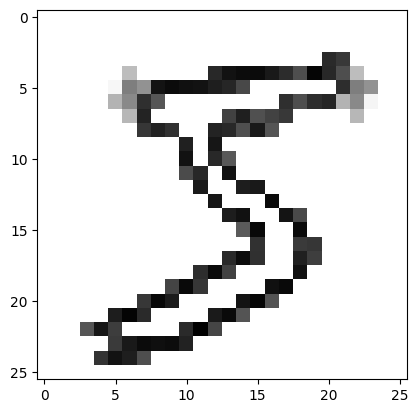

In [277]:
haar_filtered_images_test = np.zeros_like(sobel_g_images_test_norm)
m = get_haar_matrix(len(haar_filtered_images_test[0]))
for i in range(len(haar_filtered_images_test)):
    haar_filtered_images_test[i] = haar_filter(sobel_g_images_test_norm[i], m)

haar_filtered_images_train = np.zeros_like(sobel_g_images_train_norm)
m = get_haar_matrix(len(haar_filtered_images_train[0]))
for i in range(len(haar_filtered_images_train)):
    haar_filtered_images_train[i] = haar_filter(sobel_g_images_train_norm[i], m)

plt.imshow(haar_filtered_images_train[0], cmap='Greys')

In [278]:
three_intervals_bounds = [(0.1, 0.9), (0.15, 0.85), (0.2, 0.8), (0.3, 0.7), (0.4, 0.6)]
counter = 0

In [279]:
bound = three_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.5
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.5
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.1, 0.9)!!!!!!!!!!!


In [485]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7767 - loss: 0.7357 - val_accuracy: 0.8940 - val_loss: 0.3329
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9072 - loss: 0.3018 - val_accuracy: 0.9185 - val_loss: 0.2585
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9382 - loss: 0.2037 - val_accuracy: 0.9261 - val_loss: 0.2279
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9577 - loss: 0.1421 - val_accuracy: 0.9312 - val_loss: 0.2148
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9697 - loss: 0.1052 - val_accuracy: 0.9349 - val_loss: 0.2088
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7687 - loss: 0.7471 - val_accuracy: 0.8972 - val_loss: 0.3277
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9066 - loss: 0.3018 - val_accuracy: 0.9211 - val_loss: 0.2574
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9368 - loss: 0.2072 - val_acc

In [275]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7859 - loss: 0.7101 - val_accuracy: 0.8946 - val_loss: 0.3347
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9130 - loss: 0.2867 - val_accuracy: 0.9206 - val_loss: 0.2577
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9417 - loss: 0.1904 - val_accuracy: 0.9287 - val_loss: 0.2258
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9591 - loss: 0.1378 - val_accuracy: 0.9393 - val_loss: 0.2004
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9710 - loss: 0.0959 - val_accuracy: 0.9405 - val_loss: 0.2034
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9275 - loss: 0.2209
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9275 - loss: 0.2209
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9275 - loss: 0.2209
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9275 - loss: 0.2209
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

In [487]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.8761 - loss: 0.3919 - val_accuracy: 0.9750 - val_loss: 0.0783
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.9793 - loss: 0.0664 - val_accuracy: 0.9784 - val_loss: 0.0705
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 26ms/step - accuracy: 0.9880 - loss: 0.0410 - val_accuracy: 0.9812 - val_loss: 0.0618
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.9908 - loss: 0.0283 - val_accuracy: 0.9839 - val_loss: 0.0544
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9937 - loss: 0.0187 - val_accuracy: 0.9847 - val_loss: 0.0611
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.8645 - loss: 0.4201 - val_accuracy: 0.9697 - val_loss: 0.0926
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.9766 - loss: 0.0744 - val_accuracy: 0.9765 - val_loss: 0.0703
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9851 - loss: 0

In [488]:
%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9748 - loss: 0.1070
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9748 - loss: 0.1070
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9748 - loss: 0.1070
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9748 - loss: 0.1070
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9748 - loss: 0.1070
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9748 - loss: 0.1070
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9748 - loss: 0.1070
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9748 - loss: 0.1070
2.97 s ± 158 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [280]:
bound = three_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.5
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.5
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.15, 0.85)!!!!!!!!!!!


In [490]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7773 - loss: 0.7283 - val_accuracy: 0.9000 - val_loss: 0.3166
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9123 - loss: 0.2864 - val_accuracy: 0.9204 - val_loss: 0.2504
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9417 - loss: 0.1881 - val_accuracy: 0.9325 - val_loss: 0.2155
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9604 - loss: 0.1311 - val_accuracy: 0.9381 - val_loss: 0.1970
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9725 - loss: 0.0937 - val_accuracy: 0.9398 - val_loss: 0.2007
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7767 - loss: 0.7216 - val_accuracy: 0.9008 - val_loss: 0.3195
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9133 - loss: 0.2793 - val_accuracy: 0.9236 - val_loss: 0.2524
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9399 - loss: 0.1955 - val_a

In [281]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7834 - loss: 0.7079 - val_accuracy: 0.9016 - val_loss: 0.3181
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9143 - loss: 0.2787 - val_accuracy: 0.9204 - val_loss: 0.2476
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9431 - loss: 0.1849 - val_accuracy: 0.9333 - val_loss: 0.2152
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9602 - loss: 0.1302 - val_accuracy: 0.9367 - val_loss: 0.2080
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9735 - loss: 0.0895 - val_accuracy: 0.9402 - val_loss: 0.1978
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9327 - loss: 0.2250
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9327 - loss: 0.2250
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9327 - loss: 0.2250
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9327 - loss: 0.2250
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.

In [492]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.8739 - loss: 0.4052 - val_accuracy: 0.9745 - val_loss: 0.0797
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9778 - loss: 0.0665 - val_accuracy: 0.9786 - val_loss: 0.0677
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9865 - loss: 0.0432 - val_accuracy: 0.9840 - val_loss: 0.0536
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 26ms/step - accuracy: 0.9921 - loss: 0.0260 - val_accuracy: 0.9811 - val_loss: 0.0672
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.9940 - loss: 0.0202 - val_accuracy: 0.9841 - val_loss: 0.0585
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.8674 - loss: 0.4038 - val_accuracy: 0.9741 - val_loss: 0.0779
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.9792 - loss: 0.0657 - val_accuracy: 0.9824 - val_loss: 0.0571
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9867 - loss: 0

In [493]:
%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9798 - loss: 0.0956
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9798 - loss: 0.0956
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9798 - loss: 0.0956
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9798 - loss: 0.0956
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9798 - loss: 0.0956
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9798 - loss: 0.0956
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9798 - loss: 0.0956
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9798 - loss: 0.0956
2.84 s ± 146 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [282]:
bound = three_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.5
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.5
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.2, 0.8)!!!!!!!!!!!


In [495]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7828 - loss: 0.7075 - val_accuracy: 0.8977 - val_loss: 0.3227
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9110 - loss: 0.2853 - val_accuracy: 0.9195 - val_loss: 0.2565
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9436 - loss: 0.1863 - val_accuracy: 0.9317 - val_loss: 0.2150
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9614 - loss: 0.1298 - val_accuracy: 0.9339 - val_loss: 0.2145
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9745 - loss: 0.0885 - val_accuracy: 0.9354 - val_loss: 0.2067
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7757 - loss: 0.7336 - val_accuracy: 0.8977 - val_loss: 0.3307
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9131 - loss: 0.2851 - val_accuracy: 0.9202 - val_loss: 0.2543
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9412 - loss: 0.1901 - val_acc

In [283]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7813 - loss: 0.7173 - val_accuracy: 0.8999 - val_loss: 0.3195
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9119 - loss: 0.2822 - val_accuracy: 0.9195 - val_loss: 0.2527
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9416 - loss: 0.1908 - val_accuracy: 0.9321 - val_loss: 0.2207
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9602 - loss: 0.1330 - val_accuracy: 0.9358 - val_loss: 0.2073
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9741 - loss: 0.0915 - val_accuracy: 0.9416 - val_loss: 0.1995
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9297 - loss: 0.2244
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9297 - loss: 0.2244
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9297 - loss: 0.2244
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9297 - loss: 0.2244
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 

In [497]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.8769 - loss: 0.3967 - val_accuracy: 0.9768 - val_loss: 0.0754
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9811 - loss: 0.0588 - val_accuracy: 0.9838 - val_loss: 0.0528
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9867 - loss: 0.0422 - val_accuracy: 0.9836 - val_loss: 0.0546
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9911 - loss: 0.0270 - val_accuracy: 0.9829 - val_loss: 0.0539
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 26ms/step - accuracy: 0.9945 - loss: 0.0182 - val_accuracy: 0.9831 - val_loss: 0.0569
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.8710 - loss: 0.3956 - val_accuracy: 0.9762 - val_loss: 0.0774
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.9783 - loss: 0.0657 - val_accuracy: 0.9785 - val_loss: 0.0697
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.9862 - loss: 0

In [498]:
%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9823 - loss: 0.0873
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9823 - loss: 0.0873
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9823 - loss: 0.0873
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9823 - loss: 0.0873
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9823 - loss: 0.0873
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9823 - loss: 0.0873
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9823 - loss: 0.0873
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9823 - loss: 0.0873
2.75 s ± 44.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [284]:
bound = three_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.5
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.5
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.3, 0.7)!!!!!!!!!!!


In [500]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7808 - loss: 0.7074 - val_accuracy: 0.9047 - val_loss: 0.3133
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9158 - loss: 0.2745 - val_accuracy: 0.9252 - val_loss: 0.2432
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9446 - loss: 0.1823 - val_accuracy: 0.9343 - val_loss: 0.2189
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9617 - loss: 0.1291 - val_accuracy: 0.9360 - val_loss: 0.2181
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9742 - loss: 0.0897 - val_accuracy: 0.9366 - val_loss: 0.2156
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7802 - loss: 0.7056 - val_accuracy: 0.9018 - val_loss: 0.3156
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9151 - loss: 0.2694 - val_accuracy: 0.9224 - val_loss: 0.2431
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9447 - loss: 0.1780 - val_ac

In [285]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7826 - loss: 0.7095 - val_accuracy: 0.8985 - val_loss: 0.3209
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9139 - loss: 0.2780 - val_accuracy: 0.9252 - val_loss: 0.2433
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9446 - loss: 0.1809 - val_accuracy: 0.9319 - val_loss: 0.2167
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9629 - loss: 0.1273 - val_accuracy: 0.9348 - val_loss: 0.2100
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9739 - loss: 0.0919 - val_accuracy: 0.9378 - val_loss: 0.2091
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9315 - loss: 0.2303
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9315 - loss: 0.2303
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9315 - loss: 0.2303
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9315 - loss: 0.2303
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 

In [502]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.8796 - loss: 0.3805 - val_accuracy: 0.9762 - val_loss: 0.0759
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9788 - loss: 0.0679 - val_accuracy: 0.9808 - val_loss: 0.0610
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.9876 - loss: 0.0386 - val_accuracy: 0.9838 - val_loss: 0.0509
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.9913 - loss: 0.0263 - val_accuracy: 0.9826 - val_loss: 0.0631
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9945 - loss: 0.0174 - val_accuracy: 0.9869 - val_loss: 0.0482
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.8690 - loss: 0.4013 - val_accuracy: 0.9781 - val_loss: 0.0695
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 27ms/step - accuracy: 0.9787 - loss: 0.0666 - val_accuracy: 0.9827 - val_loss: 0.0538
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.9879 - loss: 0

In [503]:
%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9827 - loss: 0.0913
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9827 - loss: 0.0913
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9827 - loss: 0.0913
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9827 - loss: 0.0913
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9827 - loss: 0.0913
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9827 - loss: 0.0913
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9827 - loss: 0.0913
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9827 - loss: 0.0913
3.23 s ± 382 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [286]:
bound = three_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.5
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.5
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.4, 0.6)!!!!!!!!!!!


In [505]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7786 - loss: 0.7146 - val_accuracy: 0.8932 - val_loss: 0.3285
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9130 - loss: 0.2776 - val_accuracy: 0.9255 - val_loss: 0.2385
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9459 - loss: 0.1804 - val_accuracy: 0.9274 - val_loss: 0.2278
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9633 - loss: 0.1246 - val_accuracy: 0.9341 - val_loss: 0.2128
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9745 - loss: 0.0889 - val_accuracy: 0.9411 - val_loss: 0.2007
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7760 - loss: 0.7199 - val_accuracy: 0.9002 - val_loss: 0.3236
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9145 - loss: 0.2761 - val_accuracy: 0.9205 - val_loss: 0.2499
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9412 - loss: 0.1860 - val_acc

In [287]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7780 - loss: 0.7187 - val_accuracy: 0.8980 - val_loss: 0.3203
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9127 - loss: 0.2811 - val_accuracy: 0.9203 - val_loss: 0.2545
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9410 - loss: 0.1929 - val_accuracy: 0.9333 - val_loss: 0.2161
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9617 - loss: 0.1317 - val_accuracy: 0.9332 - val_loss: 0.2158
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9721 - loss: 0.0977 - val_accuracy: 0.9373 - val_loss: 0.2095
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9258 - loss: 0.2277
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9258 - loss: 0.2277
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9258 - loss: 0.2277
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9258 - loss: 0.2277
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 

In [507]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.8808 - loss: 0.3746 - val_accuracy: 0.9694 - val_loss: 0.0965
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.9796 - loss: 0.0612 - val_accuracy: 0.9829 - val_loss: 0.0538
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9885 - loss: 0.0383 - val_accuracy: 0.9846 - val_loss: 0.0474
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9917 - loss: 0.0233 - val_accuracy: 0.9818 - val_loss: 0.0617
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.9943 - loss: 0.0170 - val_accuracy: 0.9833 - val_loss: 0.0567
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 26ms/step - accuracy: 0.8800 - loss: 0.3806 - val_accuracy: 0.9699 - val_loss: 0.0897
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.9802 - loss: 0.0631 - val_accuracy: 0.9818 - val_loss: 0.0592
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9867 - loss: 0

In [508]:
%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9826 - loss: 0.0940
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9826 - loss: 0.0940
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9826 - loss: 0.0940
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9826 - loss: 0.0940
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9826 - loss: 0.0940
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9826 - loss: 0.0940
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9826 - loss: 0.0940
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9826 - loss: 0.0940
3.33 s ± 829 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Четыре интервала

In [288]:
four_intervals_bounds = [(0.1, 0.5, 0.9), (0.15, 0.5, 0.85), (0.2, 0.5, 0.8), (0.3, 0.5, 0.7), (0.4, 0.5, 0.6)]
counter = 0

In [289]:
bound = four_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.25
discrete_haar_train[(discrete_haar_train < bound[2]) & (discrete_haar_train > bound[1])] = 0.75
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.25
discrete_haar_test[(discrete_haar_test < bound[2]) & (discrete_haar_test > bound[1])] = 0.75
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.1, 0.5, 0.9)!!!!!!!!!!!


In [511]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7855 - loss: 0.6982 - val_accuracy: 0.9035 - val_loss: 0.3129
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9155 - loss: 0.2748 - val_accuracy: 0.9208 - val_loss: 0.2536
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9459 - loss: 0.1773 - val_accuracy: 0.9312 - val_loss: 0.2262
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9621 - loss: 0.1246 - val_accuracy: 0.9366 - val_loss: 0.2074
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9752 - loss: 0.0878 - val_accuracy: 0.9363 - val_loss: 0.2142
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7854 - loss: 0.6981 - val_accuracy: 0.9003 - val_loss: 0.3204
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9153 - loss: 0.2750 - val_accuracy: 0.9234 - val_loss: 0.2527
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9452 - loss: 0.1762 - val_accu

In [290]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7852 - loss: 0.7117 - val_accuracy: 0.8946 - val_loss: 0.3344
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9119 - loss: 0.2829 - val_accuracy: 0.9195 - val_loss: 0.2555
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9421 - loss: 0.1909 - val_accuracy: 0.9276 - val_loss: 0.2317
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9581 - loss: 0.1408 - val_accuracy: 0.9343 - val_loss: 0.2100
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9711 - loss: 0.0981 - val_accuracy: 0.9369 - val_loss: 0.2066
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9288 - loss: 0.2342
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9288 - loss: 0.2342
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9288 - loss: 0.2342
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9288 - loss: 0.2342
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 

In [513]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.8751 - loss: 0.3928 - val_accuracy: 0.9780 - val_loss: 0.0700
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9802 - loss: 0.0595 - val_accuracy: 0.9806 - val_loss: 0.0648
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.9870 - loss: 0.0393 - val_accuracy: 0.9828 - val_loss: 0.0545
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9918 - loss: 0.0266 - val_accuracy: 0.9815 - val_loss: 0.0613
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9946 - loss: 0.0172 - val_accuracy: 0.9815 - val_loss: 0.0594
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.8811 - loss: 0.3754 - val_accuracy: 0.9787 - val_loss: 0.0708
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.9806 - loss: 0.0639 - val_accuracy: 0.9765 - val_loss: 0.0765
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9867 - loss: 0

In [514]:
%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9831 - loss: 0.0917
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9831 - loss: 0.0917
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9831 - loss: 0.0917
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9831 - loss: 0.0917
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9831 - loss: 0.0917
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9831 - loss: 0.0917
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9831 - loss: 0.0917
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9831 - loss: 0.0917
2.59 s ± 147 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [291]:
bound = four_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.25
discrete_haar_train[(discrete_haar_train < bound[2]) & (discrete_haar_train > bound[1])] = 0.75
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.25
discrete_haar_test[(discrete_haar_test < bound[2]) & (discrete_haar_test > bound[1])] = 0.75
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.15, 0.5, 0.85)!!!!!!!!!!!


In [516]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7813 - loss: 0.7142 - val_accuracy: 0.8966 - val_loss: 0.3338
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9143 - loss: 0.2772 - val_accuracy: 0.9228 - val_loss: 0.2452
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9452 - loss: 0.1757 - val_accuracy: 0.9333 - val_loss: 0.2135
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9646 - loss: 0.1184 - val_accuracy: 0.9365 - val_loss: 0.2018
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9756 - loss: 0.0859 - val_accuracy: 0.9365 - val_loss: 0.2084
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7775 - loss: 0.7235 - val_accuracy: 0.9028 - val_loss: 0.3132
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9151 - loss: 0.2748 - val_accuracy: 0.9217 - val_loss: 0.2502
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9448 - loss: 0.1802 - val_ac

In [292]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7817 - loss: 0.7059 - val_accuracy: 0.9056 - val_loss: 0.3121
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9159 - loss: 0.2805 - val_accuracy: 0.9249 - val_loss: 0.2408
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9449 - loss: 0.1799 - val_accuracy: 0.9326 - val_loss: 0.2215
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9617 - loss: 0.1292 - val_accuracy: 0.9353 - val_loss: 0.2068
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9749 - loss: 0.0888 - val_accuracy: 0.9361 - val_loss: 0.2075
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9284 - loss: 0.2307
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9284 - loss: 0.2307
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9284 - loss: 0.2307
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9284 - loss: 0.2307
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0

In [518]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.8721 - loss: 0.3954 - val_accuracy: 0.9786 - val_loss: 0.0679
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.9799 - loss: 0.0615 - val_accuracy: 0.9843 - val_loss: 0.0531
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 27ms/step - accuracy: 0.9881 - loss: 0.0372 - val_accuracy: 0.9825 - val_loss: 0.0543
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.9921 - loss: 0.0249 - val_accuracy: 0.9817 - val_loss: 0.0567
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9942 - loss: 0.0180 - val_accuracy: 0.9823 - val_loss: 0.0588
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.8764 - loss: 0.3939 - val_accuracy: 0.9788 - val_loss: 0.0693
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.9783 - loss: 0.0655 - val_accuracy: 0.9817 - val_loss: 0.0571
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.9871 - loss: 0

In [519]:
%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9832 - loss: 0.0917
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9832 - loss: 0.0917
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9832 - loss: 0.0917
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9832 - loss: 0.0917
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9832 - loss: 0.0917
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9832 - loss: 0.0917
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9832 - loss: 0.0917
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9832 - loss: 0.0917
2.74 s ± 283 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [293]:
bound = four_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.25
discrete_haar_train[(discrete_haar_train < bound[2]) & (discrete_haar_train > bound[1])] = 0.75
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.25
discrete_haar_test[(discrete_haar_test < bound[2]) & (discrete_haar_test > bound[1])] = 0.75
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.2, 0.5, 0.8)!!!!!!!!!!!


In [521]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7814 - loss: 0.7100 - val_accuracy: 0.9045 - val_loss: 0.3173
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9189 - loss: 0.2674 - val_accuracy: 0.9212 - val_loss: 0.2533
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9449 - loss: 0.1780 - val_accuracy: 0.9330 - val_loss: 0.2182
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9623 - loss: 0.1208 - val_accuracy: 0.9351 - val_loss: 0.2130
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9748 - loss: 0.0875 - val_accuracy: 0.9369 - val_loss: 0.2131
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7828 - loss: 0.7054 - val_accuracy: 0.9026 - val_loss: 0.3191
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9140 - loss: 0.2787 - val_accuracy: 0.9253 - val_loss: 0.2437
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9441 - loss: 0.1827 - val_a

In [294]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7776 - loss: 0.7207 - val_accuracy: 0.9055 - val_loss: 0.3059
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9133 - loss: 0.2813 - val_accuracy: 0.9237 - val_loss: 0.2487
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9400 - loss: 0.1929 - val_accuracy: 0.9317 - val_loss: 0.2275
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9603 - loss: 0.1302 - val_accuracy: 0.9395 - val_loss: 0.2004
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9722 - loss: 0.0934 - val_accuracy: 0.9409 - val_loss: 0.2016
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9323 - loss: 0.2211
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9323 - loss: 0.2211
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9323 - loss: 0.2211
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9323 - loss: 0.2211
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy:

In [523]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.8793 - loss: 0.3734 - val_accuracy: 0.9736 - val_loss: 0.0830
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.9816 - loss: 0.0629 - val_accuracy: 0.9804 - val_loss: 0.0602
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9881 - loss: 0.0379 - val_accuracy: 0.9809 - val_loss: 0.0646
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9921 - loss: 0.0247 - val_accuracy: 0.9858 - val_loss: 0.0486
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.9950 - loss: 0.0150 - val_accuracy: 0.9862 - val_loss: 0.0466
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.8753 - loss: 0.3840 - val_accuracy: 0.9778 - val_loss: 0.0708
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.9811 - loss: 0.0627 - val_accuracy: 0.9821 - val_loss: 0.0594
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.9874 - loss: 0

In [524]:
%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9832 - loss: 0.0917
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9832 - loss: 0.0917
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9832 - loss: 0.0917
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9832 - loss: 0.0917
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9832 - loss: 0.0917
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9832 - loss: 0.0917
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9832 - loss: 0.0917
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9832 - loss: 0.0917
2.84 s ± 304 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [295]:
bound = four_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.25
discrete_haar_train[(discrete_haar_train < bound[2]) & (discrete_haar_train > bound[1])] = 0.75
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.25
discrete_haar_test[(discrete_haar_test < bound[2]) & (discrete_haar_test > bound[1])] = 0.75
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.3, 0.5, 0.7)!!!!!!!!!!!


In [526]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7774 - loss: 0.7162 - val_accuracy: 0.9005 - val_loss: 0.3145
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9135 - loss: 0.2770 - val_accuracy: 0.9194 - val_loss: 0.2603
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9449 - loss: 0.1815 - val_accuracy: 0.9252 - val_loss: 0.2362
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9613 - loss: 0.1281 - val_accuracy: 0.9367 - val_loss: 0.2085
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9748 - loss: 0.0877 - val_accuracy: 0.9361 - val_loss: 0.2156
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7765 - loss: 0.7216 - val_accuracy: 0.9009 - val_loss: 0.3152
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9181 - loss: 0.2702 - val_accuracy: 0.9258 - val_loss: 0.2454
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9437 - loss: 0.1789 - val_acc

In [296]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7820 - loss: 0.7241 - val_accuracy: 0.9097 - val_loss: 0.2967
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9156 - loss: 0.2662 - val_accuracy: 0.9242 - val_loss: 0.2440
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9436 - loss: 0.1830 - val_accuracy: 0.9300 - val_loss: 0.2241
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9628 - loss: 0.1259 - val_accuracy: 0.9367 - val_loss: 0.2083
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9747 - loss: 0.0906 - val_accuracy: 0.9371 - val_loss: 0.2079
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9300 - loss: 0.2214
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9300 - loss: 0.2214
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9300 - loss: 0.2214
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9300 - loss: 0.2214
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 

In [528]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.8784 - loss: 0.3788 - val_accuracy: 0.9755 - val_loss: 0.0787
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9799 - loss: 0.0655 - val_accuracy: 0.9829 - val_loss: 0.0543
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9868 - loss: 0.0396 - val_accuracy: 0.9813 - val_loss: 0.0559
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9909 - loss: 0.0259 - val_accuracy: 0.9850 - val_loss: 0.0502
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.9936 - loss: 0.0186 - val_accuracy: 0.9852 - val_loss: 0.0512
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.8769 - loss: 0.3770 - val_accuracy: 0.9753 - val_loss: 0.0845
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 26ms/step - accuracy: 0.9798 - loss: 0.0638 - val_accuracy: 0.9808 - val_loss: 0.0633
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - accuracy: 0.9868 - loss: 0

In [529]:
%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9829 - loss: 0.0924
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9829 - loss: 0.0924
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9829 - loss: 0.0924
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9829 - loss: 0.0924
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9829 - loss: 0.0924
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9829 - loss: 0.0924
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9829 - loss: 0.0924
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9829 - loss: 0.0924
2.8 s ± 293 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [297]:
bound = four_intervals_bounds[4]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.25
discrete_haar_train[(discrete_haar_train < bound[2]) & (discrete_haar_train > bound[1])] = 0.75
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.25
discrete_haar_test[(discrete_haar_test < bound[2]) & (discrete_haar_test > bound[1])] = 0.75
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.4, 0.5, 0.6)!!!!!!!!!!!


In [28]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7790 - loss: 0.7115 - val_accuracy: 0.9018 - val_loss: 0.3202
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9125 - loss: 0.2837 - val_accuracy: 0.9207 - val_loss: 0.2511
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9436 - loss: 0.1834 - val_accuracy: 0.9329 - val_loss: 0.2168
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9644 - loss: 0.1202 - val_accuracy: 0.9333 - val_loss: 0.2133
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9744 - loss: 0.0898 - val_accuracy: 0.9393 - val_loss: 0.2077
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7840 - loss: 0.7019 - val_accuracy: 0.8988 - val_loss: 0.3253
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9117 - loss: 0.2817 - val_accuracy: 0.9224 - val_loss: 0.2596
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9438 - loss: 0.1821 - val_ac

In [298]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7828 - loss: 0.7121 - val_accuracy: 0.8967 - val_loss: 0.3297
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9130 - loss: 0.2782 - val_accuracy: 0.9200 - val_loss: 0.2568
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9428 - loss: 0.1852 - val_accuracy: 0.9308 - val_loss: 0.2281
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9600 - loss: 0.1317 - val_accuracy: 0.9342 - val_loss: 0.2113
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9728 - loss: 0.0945 - val_accuracy: 0.9412 - val_loss: 0.2002
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9316 - loss: 0.2130
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9316 - loss: 0.2130
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9316 - loss: 0.2130
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9316 - loss: 0.2130
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0

In [22]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5


C:\Users\boris\anaconda3\envs\Wavelets\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.8774 - loss: 0.3859 - val_accuracy: 0.9732 - val_loss: 0.0849
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9782 - loss: 0.0647 - val_accuracy: 0.9818 - val_loss: 0.0629
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9869 - loss: 0.0405 - val_accuracy: 0.9817 - val_loss: 0.0575
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9914 - loss: 0.0267 - val_accuracy: 0.9845 - val_loss: 0.0533
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - accuracy: 0.9940 - loss: 0.0175 - val_accuracy: 0.9840 - val_loss: 0.0527
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.8674 - loss: 0.4078 - val_accuracy: 0.9750 - val_loss: 0.0780
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9792 - loss: 0.0643 - val_accuracy: 0.9833 - val_loss: 0.0535
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.9880 - loss: 0.0391 - va

In [26]:
%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9857 - loss: 0.0510
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9857 - loss: 0.0510
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9857 - loss: 0.0510
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9857 - loss: 0.0510
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9857 - loss: 0.0510
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9857 - loss: 0.0510
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9857 - loss: 0.0510
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9857 - loss: 0.0510
2.33 s ± 236 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Обучение после фильтра Хаара

## Обучение после преобазования Хаара 

In [34]:
haar_filtered_images_test = np.zeros_like(mnist_test_norm[:, :26, :26])
m = get_haar_matrix(len(haar_filtered_images_test[0]))
for i in range(len(haar_filtered_images_test)):
    haar_filtered_images_test[i] = haar_filter(mnist_test_norm[i], m)[:26, :26]

In [35]:
haar_filtered_images_train = np.zeros_like(mnist_train_norm[:, :26, :26])
m = get_haar_matrix(len(haar_filtered_images_train[0]))
for i in range(len(haar_filtered_images_train)):
    haar_filtered_images_train[i] = haar_filter(mnist_train_norm[i], m)[:26, :26]

In [36]:
np.max(haar_filtered_images_train)

1.0000000000000002

In [37]:
%%timeit 

model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8502 - loss: 0.5308 - val_accuracy: 0.9482 - val_loss: 0.1895
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9565 - loss: 0.1554 - val_accuracy: 0.9598 - val_loss: 0.1368
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9729 - loss: 0.0956 - val_accuracy: 0.9601 - val_loss: 0.1287
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9817 - loss: 0.0659 - val_accuracy: 0.9647 - val_loss: 0.1185
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9864 - loss: 0.0493 - val_accuracy: 0.9644 - val_loss: 0.1181
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8438 - loss: 0.5459 - val_accuracy: 0.9477 - val_loss: 0.1884
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9517 - loss: 0.1642 - val_accuracy: 0.9588 - val_loss: 0.1366
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9710 - loss: 0.1014 - val_acc

In [38]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8446 - loss: 0.5449 - val_accuracy: 0.9434 - val_loss: 0.1953
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9535 - loss: 0.1639 - val_accuracy: 0.9592 - val_loss: 0.1396
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9717 - loss: 0.0999 - val_accuracy: 0.9599 - val_loss: 0.1294
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9785 - loss: 0.0728 - val_accuracy: 0.9672 - val_loss: 0.1152
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9863 - loss: 0.0498 - val_accuracy: 0.9652 - val_loss: 0.1137
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9615 - loss: 0.1314
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9615 - loss: 0.1314
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9615 - loss: 0.1314
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9615 - loss: 0.1314
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.

In [40]:
%%timeit 

CNN_by_haar_filter = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

CNN_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

CNN_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.9010 - loss: 0.3317 - val_accuracy: 0.9830 - val_loss: 0.0560
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9847 - loss: 0.0510 - val_accuracy: 0.9836 - val_loss: 0.0518
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9897 - loss: 0.0328 - val_accuracy: 0.9827 - val_loss: 0.0621
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 25ms/step - accuracy: 0.9930 - loss: 0.0225 - val_accuracy: 0.9872 - val_loss: 0.0450
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.9954 - loss: 0.0149 - val_accuracy: 0.9872 - val_loss: 0.0465
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.8935 - loss: 0.3392 - val_accuracy: 0.9803 - val_loss: 0.0667
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.9833 - loss: 0.0549 - val_accuracy: 0.9841 - val_loss: 0.0502
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.9896 - loss: 0

In [41]:
CNN_by_haar_filter = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

CNN_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

CNN_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.8942 - loss: 0.3338 - val_accuracy: 0.9803 - val_loss: 0.0612
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9845 - loss: 0.0500 - val_accuracy: 0.9825 - val_loss: 0.0563
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9895 - loss: 0.0328 - val_accuracy: 0.9849 - val_loss: 0.0491
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.9933 - loss: 0.0207 - val_accuracy: 0.9876 - val_loss: 0.0462
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9948 - loss: 0.0163 - val_accuracy: 0.9886 - val_loss: 0.0484
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9853 - loss: 0.0533
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9853 - loss: 0.0533
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9853 - loss: 0.0533
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9853 - loss: 0.0533
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - ac

## Два интервала

In [42]:
two_intervals_bounds = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
counter = 0

In [43]:
bound = two_intervals_bounds[counter]
discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound] = 1
discrete_haar_train[discrete_haar_train <= bound] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound] = 1
discrete_haar_test[discrete_haar_test <= bound] = 0

counter += 1

In [44]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8482 - loss: 0.5337 - val_accuracy: 0.9437 - val_loss: 0.1914
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9544 - loss: 0.1622 - val_accuracy: 0.9561 - val_loss: 0.1453
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9713 - loss: 0.0991 - val_accuracy: 0.9610 - val_loss: 0.1298
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9813 - loss: 0.0663 - val_accuracy: 0.9634 - val_loss: 0.1231
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9863 - loss: 0.0480 - val_accuracy: 0.9651 - val_loss: 0.1203
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8514 - loss: 0.5231 - val_accuracy: 0.9444 - val_loss: 0.1966
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9526 - loss: 0.1647 - val_accuracy: 0.9556 - val_loss: 0.1488
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9707 - loss: 0.1023 - val_accu

In [45]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8452 - loss: 0.5441 - val_accuracy: 0.9486 - val_loss: 0.1887
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9550 - loss: 0.1565 - val_accuracy: 0.9576 - val_loss: 0.1468
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9729 - loss: 0.0952 - val_accuracy: 0.9625 - val_loss: 0.1219
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9805 - loss: 0.0690 - val_accuracy: 0.9658 - val_loss: 0.1125
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9880 - loss: 0.0451 - val_accuracy: 0.9670 - val_loss: 0.1101
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9654 - loss: 0.1169
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9654 - loss: 0.1169
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9654 - loss: 0.1169
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9654 - loss: 0.1169
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0

In [46]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.9041 - loss: 0.3152 - val_accuracy: 0.9739 - val_loss: 0.0887
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.9833 - loss: 0.0527 - val_accuracy: 0.9856 - val_loss: 0.0523
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9887 - loss: 0.0336 - val_accuracy: 0.9858 - val_loss: 0.0479
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9925 - loss: 0.0228 - val_accuracy: 0.9870 - val_loss: 0.0482
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.9946 - loss: 0.0152 - val_accuracy: 0.9852 - val_loss: 0.0510
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.8990 - loss: 0.3245 - val_accuracy: 0.9803 - val_loss: 0.0640
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9826 - loss: 0.0567 - val_accuracy: 0.9848 - val_loss: 0.0509
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9896 - loss: 0

In [47]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.8950 - loss: 0.3341 - val_accuracy: 0.9831 - val_loss: 0.0549
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9833 - loss: 0.0532 - val_accuracy: 0.9832 - val_loss: 0.0540
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9898 - loss: 0.0334 - val_accuracy: 0.9870 - val_loss: 0.0437
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.9936 - loss: 0.0209 - val_accuracy: 0.9830 - val_loss: 0.0653
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9947 - loss: 0.0155 - val_accuracy: 0.9863 - val_loss: 0.0519
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9834 - loss: 0.0550
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9834 - loss: 0.0550
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9834 - loss: 0.0550
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9834 - loss: 0.0550
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - ac

In [48]:
bound = two_intervals_bounds[counter]
discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound] = 1
discrete_haar_train[discrete_haar_train <= bound] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound] = 1
discrete_haar_test[discrete_haar_test <= bound] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!0.1!!!!!!!!!!!


In [49]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8503 - loss: 0.5297 - val_accuracy: 0.9472 - val_loss: 0.1858
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9550 - loss: 0.1548 - val_accuracy: 0.9585 - val_loss: 0.1430
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9742 - loss: 0.0947 - val_accuracy: 0.9600 - val_loss: 0.1301
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9825 - loss: 0.0638 - val_accuracy: 0.9606 - val_loss: 0.1324
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9865 - loss: 0.0486 - val_accuracy: 0.9654 - val_loss: 0.1206
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8443 - loss: 0.5512 - val_accuracy: 0.9503 - val_loss: 0.1827
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9543 - loss: 0.1613 - val_accuracy: 0.9578 - val_loss: 0.1365
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9718 - loss: 0.0996 - val_acc

In [50]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8472 - loss: 0.5442 - val_accuracy: 0.9479 - val_loss: 0.1888
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9533 - loss: 0.1640 - val_accuracy: 0.9572 - val_loss: 0.1475
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9707 - loss: 0.1037 - val_accuracy: 0.9638 - val_loss: 0.1264
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9797 - loss: 0.0698 - val_accuracy: 0.9655 - val_loss: 0.1139
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9865 - loss: 0.0479 - val_accuracy: 0.9679 - val_loss: 0.1093
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9641 - loss: 0.1191
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9641 - loss: 0.1191
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9641 - loss: 0.1191
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9641 - loss: 0.1191
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0

In [51]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.8940 - loss: 0.3297 - val_accuracy: 0.9778 - val_loss: 0.0758
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9833 - loss: 0.0538 - val_accuracy: 0.9842 - val_loss: 0.0513
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 0.9902 - loss: 0.0312 - val_accuracy: 0.9843 - val_loss: 0.0509
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9924 - loss: 0.0235 - val_accuracy: 0.9854 - val_loss: 0.0543
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9946 - loss: 0.0163 - val_accuracy: 0.9869 - val_loss: 0.0489
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.9005 - loss: 0.3271 - val_accuracy: 0.9798 - val_loss: 0.0649
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9826 - loss: 0.0550 - val_accuracy: 0.9833 - val_loss: 0.0551
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9891 - loss: 0

In [52]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.8958 - loss: 0.3388 - val_accuracy: 0.9787 - val_loss: 0.0696
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9841 - loss: 0.0510 - val_accuracy: 0.9858 - val_loss: 0.0494
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9899 - loss: 0.0314 - val_accuracy: 0.9848 - val_loss: 0.0516
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.9923 - loss: 0.0248 - val_accuracy: 0.9856 - val_loss: 0.0504
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9947 - loss: 0.0160 - val_accuracy: 0.9863 - val_loss: 0.0471
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9823 - loss: 0.0573
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9823 - loss: 0.0573
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9823 - loss: 0.0573
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9823 - loss: 0.0573
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

In [53]:
bound = two_intervals_bounds[counter]
discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound] = 1
discrete_haar_train[discrete_haar_train <= bound] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound] = 1
discrete_haar_test[discrete_haar_test <= bound] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!0.2!!!!!!!!!!!


In [54]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8481 - loss: 0.5358 - val_accuracy: 0.9456 - val_loss: 0.1874
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9542 - loss: 0.1571 - val_accuracy: 0.9592 - val_loss: 0.1396
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9710 - loss: 0.0988 - val_accuracy: 0.9613 - val_loss: 0.1282
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9810 - loss: 0.0665 - val_accuracy: 0.9653 - val_loss: 0.1175
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9867 - loss: 0.0487 - val_accuracy: 0.9644 - val_loss: 0.1184
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8436 - loss: 0.5469 - val_accuracy: 0.9482 - val_loss: 0.1833
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9538 - loss: 0.1576 - val_accuracy: 0.9574 - val_loss: 0.1443
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9718 - loss: 0.0994 - val_acc

In [55]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8493 - loss: 0.5424 - val_accuracy: 0.9467 - val_loss: 0.1900
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9548 - loss: 0.1613 - val_accuracy: 0.9553 - val_loss: 0.1479
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9702 - loss: 0.1024 - val_accuracy: 0.9600 - val_loss: 0.1370
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9798 - loss: 0.0720 - val_accuracy: 0.9637 - val_loss: 0.1229
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9859 - loss: 0.0511 - val_accuracy: 0.9673 - val_loss: 0.1186
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9622 - loss: 0.1199
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9622 - loss: 0.1199
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9622 - loss: 0.1199
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9622 - loss: 0.1199
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [56]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.8893 - loss: 0.3492 - val_accuracy: 0.9797 - val_loss: 0.0669
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9826 - loss: 0.0562 - val_accuracy: 0.9850 - val_loss: 0.0508
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9887 - loss: 0.0341 - val_accuracy: 0.9838 - val_loss: 0.0549
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.9920 - loss: 0.0239 - val_accuracy: 0.9870 - val_loss: 0.0419
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.9953 - loss: 0.0146 - val_accuracy: 0.9882 - val_loss: 0.0430
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9862 - loss: 0.0506
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9862 - loss: 0.0506
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9862 - loss: 0.0506
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9862 - loss: 0.0506
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - ac

In [57]:
bound = two_intervals_bounds[counter]
discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound] = 1
discrete_haar_train[discrete_haar_train <= bound] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound] = 1
discrete_haar_test[discrete_haar_test <= bound] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!0.3!!!!!!!!!!!


In [58]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8405 - loss: 0.5500 - val_accuracy: 0.9458 - val_loss: 0.1934
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9526 - loss: 0.1630 - val_accuracy: 0.9561 - val_loss: 0.1432
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9703 - loss: 0.0989 - val_accuracy: 0.9628 - val_loss: 0.1254
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9809 - loss: 0.0681 - val_accuracy: 0.9639 - val_loss: 0.1175
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9865 - loss: 0.0474 - val_accuracy: 0.9682 - val_loss: 0.1097
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8449 - loss: 0.5438 - val_accuracy: 0.9430 - val_loss: 0.1947
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9527 - loss: 0.1621 - val_accuracy: 0.9568 - val_loss: 0.1493
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9700 - loss: 0.1007 - val_ac

In [59]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8471 - loss: 0.5418 - val_accuracy: 0.9489 - val_loss: 0.1826
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9520 - loss: 0.1673 - val_accuracy: 0.9557 - val_loss: 0.1493
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9721 - loss: 0.0994 - val_accuracy: 0.9657 - val_loss: 0.1171
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9821 - loss: 0.0664 - val_accuracy: 0.9651 - val_loss: 0.1197
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9867 - loss: 0.0476 - val_accuracy: 0.9647 - val_loss: 0.1188
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9610 - loss: 0.1330
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9610 - loss: 0.1330
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9610 - loss: 0.1330
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9610 - loss: 0.1330
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [60]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.8914 - loss: 0.3416 - val_accuracy: 0.9827 - val_loss: 0.0585
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9831 - loss: 0.0543 - val_accuracy: 0.9846 - val_loss: 0.0531
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.9898 - loss: 0.0318 - val_accuracy: 0.9852 - val_loss: 0.0513
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9936 - loss: 0.0198 - val_accuracy: 0.9874 - val_loss: 0.0441
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9953 - loss: 0.0142 - val_accuracy: 0.9881 - val_loss: 0.0449
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9854 - loss: 0.0566
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9854 - loss: 0.0566
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9854 - loss: 0.0566
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9854 - loss: 0.0566
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - ac

In [61]:
bound = two_intervals_bounds[counter]
discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound] = 1
discrete_haar_train[discrete_haar_train <= bound] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound] = 1
discrete_haar_test[discrete_haar_test <= bound] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!0.4!!!!!!!!!!!


In [62]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8493 - loss: 0.5337 - val_accuracy: 0.9446 - val_loss: 0.1916
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9558 - loss: 0.1562 - val_accuracy: 0.9606 - val_loss: 0.1379
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9727 - loss: 0.0947 - val_accuracy: 0.9645 - val_loss: 0.1198
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9815 - loss: 0.0656 - val_accuracy: 0.9639 - val_loss: 0.1198
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9878 - loss: 0.0448 - val_accuracy: 0.9624 - val_loss: 0.1196
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8470 - loss: 0.5324 - val_accuracy: 0.9472 - val_loss: 0.1872
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9533 - loss: 0.1588 - val_accuracy: 0.9592 - val_loss: 0.1370
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9722 - loss: 0.0981 - val_acc

In [63]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8465 - loss: 0.5415 - val_accuracy: 0.9482 - val_loss: 0.1901
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9541 - loss: 0.1587 - val_accuracy: 0.9621 - val_loss: 0.1386
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9732 - loss: 0.0976 - val_accuracy: 0.9637 - val_loss: 0.1252
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9806 - loss: 0.0687 - val_accuracy: 0.9658 - val_loss: 0.1105
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9885 - loss: 0.0453 - val_accuracy: 0.9675 - val_loss: 0.1122
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9612 - loss: 0.1277
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9612 - loss: 0.1277
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9612 - loss: 0.1277
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9612 - loss: 0.1277
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [64]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.8911 - loss: 0.3431 - val_accuracy: 0.9807 - val_loss: 0.0653
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9818 - loss: 0.0546 - val_accuracy: 0.9810 - val_loss: 0.0622
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9884 - loss: 0.0355 - val_accuracy: 0.9852 - val_loss: 0.0513
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.9927 - loss: 0.0220 - val_accuracy: 0.9861 - val_loss: 0.0528
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.9952 - loss: 0.0155 - val_accuracy: 0.9847 - val_loss: 0.0546
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9823 - loss: 0.0554
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9823 - loss: 0.0554
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9823 - loss: 0.0554
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9823 - loss: 0.0554
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - ac

In [65]:
bound = two_intervals_bounds[counter]
discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound] = 1
discrete_haar_train[discrete_haar_train <= bound] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound] = 1
discrete_haar_test[discrete_haar_test <= bound] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!0.5!!!!!!!!!!!


In [66]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8503 - loss: 0.5300 - val_accuracy: 0.9413 - val_loss: 0.1996
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9544 - loss: 0.1571 - val_accuracy: 0.9588 - val_loss: 0.1459
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9723 - loss: 0.0976 - val_accuracy: 0.9631 - val_loss: 0.1260
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9810 - loss: 0.0686 - val_accuracy: 0.9647 - val_loss: 0.1178
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9877 - loss: 0.0466 - val_accuracy: 0.9673 - val_loss: 0.1145
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8490 - loss: 0.5380 - val_accuracy: 0.9419 - val_loss: 0.1973
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9520 - loss: 0.1679 - val_accuracy: 0.9552 - val_loss: 0.1511
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9688 - loss: 0.1075 - val_a

In [67]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8454 - loss: 0.5429 - val_accuracy: 0.9477 - val_loss: 0.1884
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9532 - loss: 0.1642 - val_accuracy: 0.9542 - val_loss: 0.1551
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9717 - loss: 0.1020 - val_accuracy: 0.9579 - val_loss: 0.1422
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9804 - loss: 0.0693 - val_accuracy: 0.9657 - val_loss: 0.1184
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9861 - loss: 0.0507 - val_accuracy: 0.9692 - val_loss: 0.1108
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9630 - loss: 0.1213
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9630 - loss: 0.1213
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9630 - loss: 0.1213
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9630 - loss: 0.1213
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [68]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.8935 - loss: 0.3417 - val_accuracy: 0.9812 - val_loss: 0.0675
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.9839 - loss: 0.0516 - val_accuracy: 0.9846 - val_loss: 0.0522
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9893 - loss: 0.0335 - val_accuracy: 0.9859 - val_loss: 0.0467
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9930 - loss: 0.0218 - val_accuracy: 0.9862 - val_loss: 0.0467
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.9938 - loss: 0.0164 - val_accuracy: 0.9849 - val_loss: 0.0528
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9818 - loss: 0.0621
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9818 - loss: 0.0621
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9818 - loss: 0.0621
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9818 - loss: 0.0621
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

In [69]:
bound = two_intervals_bounds[counter]
discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound] = 1
discrete_haar_train[discrete_haar_train <= bound] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound] = 1
discrete_haar_test[discrete_haar_test <= bound] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!0.6!!!!!!!!!!!


In [70]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8479 - loss: 0.5319 - val_accuracy: 0.9391 - val_loss: 0.1992
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9529 - loss: 0.1632 - val_accuracy: 0.9581 - val_loss: 0.1478
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9684 - loss: 0.1042 - val_accuracy: 0.9655 - val_loss: 0.1194
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9812 - loss: 0.0682 - val_accuracy: 0.9641 - val_loss: 0.1221
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9868 - loss: 0.0473 - val_accuracy: 0.9651 - val_loss: 0.1200
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8523 - loss: 0.5250 - val_accuracy: 0.9503 - val_loss: 0.1778
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9555 - loss: 0.1537 - val_accuracy: 0.9606 - val_loss: 0.1392
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9725 - loss: 0.0967 - val_accu

In [71]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8509 - loss: 0.5387 - val_accuracy: 0.9413 - val_loss: 0.2046
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9541 - loss: 0.1621 - val_accuracy: 0.9617 - val_loss: 0.1377
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9715 - loss: 0.1031 - val_accuracy: 0.9643 - val_loss: 0.1238
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9813 - loss: 0.0674 - val_accuracy: 0.9652 - val_loss: 0.1177
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9876 - loss: 0.0456 - val_accuracy: 0.9664 - val_loss: 0.1152
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9622 - loss: 0.1202
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9622 - loss: 0.1202
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9622 - loss: 0.1202
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9622 - loss: 0.1202
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [72]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.8992 - loss: 0.3329 - val_accuracy: 0.9749 - val_loss: 0.0777
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.9822 - loss: 0.0543 - val_accuracy: 0.9846 - val_loss: 0.0488
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9879 - loss: 0.0371 - val_accuracy: 0.9845 - val_loss: 0.0472
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9916 - loss: 0.0247 - val_accuracy: 0.9839 - val_loss: 0.0575
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.9946 - loss: 0.0153 - val_accuracy: 0.9841 - val_loss: 0.0597
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9805 - loss: 0.0614
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9805 - loss: 0.0614
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9805 - loss: 0.0614
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9805 - loss: 0.0614
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

## Три интервала

In [73]:
three_intervals_bounds = [(0.1, 0.9), (0.15, 0.85), (0.2, 0.8), (0.3, 0.7), (0.4, 0.6)]
counter = 0

In [74]:
bound = three_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.5
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.5
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.1, 0.9)!!!!!!!!!!!


In [75]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8453 - loss: 0.5524 - val_accuracy: 0.9413 - val_loss: 0.2104
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9500 - loss: 0.1790 - val_accuracy: 0.9532 - val_loss: 0.1599
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9692 - loss: 0.1100 - val_accuracy: 0.9620 - val_loss: 0.1293
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9782 - loss: 0.0780 - val_accuracy: 0.9638 - val_loss: 0.1261
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9860 - loss: 0.0540 - val_accuracy: 0.9650 - val_loss: 0.1228
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8453 - loss: 0.5493 - val_accuracy: 0.9434 - val_loss: 0.1982
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9534 - loss: 0.1690 - val_accuracy: 0.9562 - val_loss: 0.1510
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9700 - loss: 0.1060 - val_a

In [76]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8469 - loss: 0.5351 - val_accuracy: 0.9448 - val_loss: 0.1947
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9549 - loss: 0.1602 - val_accuracy: 0.9572 - val_loss: 0.1432
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9709 - loss: 0.1001 - val_accuracy: 0.9627 - val_loss: 0.1277
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9802 - loss: 0.0709 - val_accuracy: 0.9649 - val_loss: 0.1203
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9861 - loss: 0.0498 - val_accuracy: 0.9663 - val_loss: 0.1138
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9605 - loss: 0.1261
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9605 - loss: 0.1261
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9605 - loss: 0.1261
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9605 - loss: 0.1261
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy:

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [77]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.9052 - loss: 0.3194 - val_accuracy: 0.9807 - val_loss: 0.0658
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9835 - loss: 0.0529 - val_accuracy: 0.9838 - val_loss: 0.0529
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 0.9894 - loss: 0.0339 - val_accuracy: 0.9862 - val_loss: 0.0470
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9925 - loss: 0.0226 - val_accuracy: 0.9872 - val_loss: 0.0511
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9945 - loss: 0.0155 - val_accuracy: 0.9868 - val_loss: 0.0465
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9836 - loss: 0.0532
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9836 - loss: 0.0532
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9836 - loss: 0.0532
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9836 - loss: 0.0532
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - ac

In [78]:
bound = three_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.5
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.5
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.15, 0.85)!!!!!!!!!!!


In [79]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8440 - loss: 0.5537 - val_accuracy: 0.9453 - val_loss: 0.1963
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9511 - loss: 0.1715 - val_accuracy: 0.9570 - val_loss: 0.1504
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9694 - loss: 0.1115 - val_accuracy: 0.9621 - val_loss: 0.1318
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9792 - loss: 0.0742 - val_accuracy: 0.9643 - val_loss: 0.1209
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9855 - loss: 0.0539 - val_accuracy: 0.9674 - val_loss: 0.1106
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8412 - loss: 0.5571 - val_accuracy: 0.9459 - val_loss: 0.1974
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9506 - loss: 0.1701 - val_accuracy: 0.9548 - val_loss: 0.1550
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9687 - loss: 0.1066 - val_a

In [80]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8503 - loss: 0.5357 - val_accuracy: 0.9453 - val_loss: 0.1952
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9536 - loss: 0.1603 - val_accuracy: 0.9594 - val_loss: 0.1379
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9691 - loss: 0.1069 - val_accuracy: 0.9619 - val_loss: 0.1318
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9796 - loss: 0.0715 - val_accuracy: 0.9645 - val_loss: 0.1192
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9861 - loss: 0.0531 - val_accuracy: 0.9650 - val_loss: 0.1196
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9611 - loss: 0.1278
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9611 - loss: 0.1278
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9611 - loss: 0.1278
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9611 - loss: 0.1278
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [81]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.8932 - loss: 0.3366 - val_accuracy: 0.9825 - val_loss: 0.0607
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9837 - loss: 0.0503 - val_accuracy: 0.9856 - val_loss: 0.0501
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.9899 - loss: 0.0330 - val_accuracy: 0.9851 - val_loss: 0.0489
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9925 - loss: 0.0246 - val_accuracy: 0.9876 - val_loss: 0.0453
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9937 - loss: 0.0190 - val_accuracy: 0.9870 - val_loss: 0.0458
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9833 - loss: 0.0575
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9833 - loss: 0.0575
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9833 - loss: 0.0575
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9833 - loss: 0.0575
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - ac

In [82]:
bound = three_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.5
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.5
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.2, 0.8)!!!!!!!!!!!


In [83]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8463 - loss: 0.5427 - val_accuracy: 0.9421 - val_loss: 0.2007
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9512 - loss: 0.1687 - val_accuracy: 0.9561 - val_loss: 0.1479
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9714 - loss: 0.1016 - val_accuracy: 0.9641 - val_loss: 0.1232
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9808 - loss: 0.0685 - val_accuracy: 0.9621 - val_loss: 0.1262
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9865 - loss: 0.0502 - val_accuracy: 0.9643 - val_loss: 0.1274
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8452 - loss: 0.5487 - val_accuracy: 0.9482 - val_loss: 0.1853
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9545 - loss: 0.1611 - val_accuracy: 0.9532 - val_loss: 0.1510
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9704 - loss: 0.1031 - val_acc

In [84]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8442 - loss: 0.5467 - val_accuracy: 0.9413 - val_loss: 0.2023
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9557 - loss: 0.1584 - val_accuracy: 0.9588 - val_loss: 0.1432
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9713 - loss: 0.1006 - val_accuracy: 0.9621 - val_loss: 0.1296
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9808 - loss: 0.0694 - val_accuracy: 0.9646 - val_loss: 0.1201
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9867 - loss: 0.0487 - val_accuracy: 0.9656 - val_loss: 0.1148
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9609 - loss: 0.1212
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9609 - loss: 0.1212
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9609 - loss: 0.1212
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9609 - loss: 0.1212
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [85]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.8953 - loss: 0.3407 - val_accuracy: 0.9826 - val_loss: 0.0612
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9836 - loss: 0.0542 - val_accuracy: 0.9850 - val_loss: 0.0513
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9898 - loss: 0.0328 - val_accuracy: 0.9859 - val_loss: 0.0496
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9922 - loss: 0.0240 - val_accuracy: 0.9830 - val_loss: 0.0575
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - accuracy: 0.9946 - loss: 0.0151 - val_accuracy: 0.9872 - val_loss: 0.0466
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9843 - loss: 0.0541
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9843 - loss: 0.0541
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9843 - loss: 0.0541
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9843 - loss: 0.0541
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - ac

In [86]:
bound = three_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.5
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.5
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.3, 0.7)!!!!!!!!!!!


In [87]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8440 - loss: 0.5502 - val_accuracy: 0.9435 - val_loss: 0.1933
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9551 - loss: 0.1587 - val_accuracy: 0.9582 - val_loss: 0.1399
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9722 - loss: 0.0972 - val_accuracy: 0.9596 - val_loss: 0.1328
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9816 - loss: 0.0667 - val_accuracy: 0.9643 - val_loss: 0.1185
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9872 - loss: 0.0457 - val_accuracy: 0.9647 - val_loss: 0.1208
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8521 - loss: 0.5359 - val_accuracy: 0.9483 - val_loss: 0.1853
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9552 - loss: 0.1601 - val_accuracy: 0.9517 - val_loss: 0.1583
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9710 - loss: 0.1027 - val_accu

In [88]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8452 - loss: 0.5457 - val_accuracy: 0.9473 - val_loss: 0.1898
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9544 - loss: 0.1611 - val_accuracy: 0.9576 - val_loss: 0.1490
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9713 - loss: 0.1053 - val_accuracy: 0.9642 - val_loss: 0.1249
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9795 - loss: 0.0722 - val_accuracy: 0.9647 - val_loss: 0.1213
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9860 - loss: 0.0524 - val_accuracy: 0.9647 - val_loss: 0.1232
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9580 - loss: 0.1312
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9580 - loss: 0.1312
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9580 - loss: 0.1312
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9580 - loss: 0.1312
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [89]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.8936 - loss: 0.3319 - val_accuracy: 0.9796 - val_loss: 0.0694
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9833 - loss: 0.0515 - val_accuracy: 0.9837 - val_loss: 0.0518
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.9902 - loss: 0.0319 - val_accuracy: 0.9859 - val_loss: 0.0469
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9924 - loss: 0.0223 - val_accuracy: 0.9836 - val_loss: 0.0574
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9957 - loss: 0.0134 - val_accuracy: 0.9867 - val_loss: 0.0532
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9810 - loss: 0.0643
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9810 - loss: 0.0643
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9810 - loss: 0.0643
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9810 - loss: 0.0643
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - ac

In [90]:
bound = three_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.5
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.5
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.4, 0.6)!!!!!!!!!!!


In [91]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8412 - loss: 0.5370 - val_accuracy: 0.9459 - val_loss: 0.1905
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9555 - loss: 0.1575 - val_accuracy: 0.9583 - val_loss: 0.1413
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9711 - loss: 0.0973 - val_accuracy: 0.9640 - val_loss: 0.1236
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9810 - loss: 0.0677 - val_accuracy: 0.9651 - val_loss: 0.1193
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9882 - loss: 0.0443 - val_accuracy: 0.9668 - val_loss: 0.1140
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8494 - loss: 0.5241 - val_accuracy: 0.9425 - val_loss: 0.2031
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9516 - loss: 0.1662 - val_accuracy: 0.9602 - val_loss: 0.1453
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9691 - loss: 0.1033 - val_accu

In [92]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8487 - loss: 0.5296 - val_accuracy: 0.9466 - val_loss: 0.1853
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9549 - loss: 0.1546 - val_accuracy: 0.9586 - val_loss: 0.1455
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9715 - loss: 0.0975 - val_accuracy: 0.9658 - val_loss: 0.1230
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9812 - loss: 0.0675 - val_accuracy: 0.9630 - val_loss: 0.1199
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9862 - loss: 0.0494 - val_accuracy: 0.9667 - val_loss: 0.1153
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9598 - loss: 0.1268
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9598 - loss: 0.1268
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9598 - loss: 0.1268
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9598 - loss: 0.1268
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [93]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.8868 - loss: 0.3591 - val_accuracy: 0.9790 - val_loss: 0.0704
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.9831 - loss: 0.0511 - val_accuracy: 0.9844 - val_loss: 0.0538
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9895 - loss: 0.0344 - val_accuracy: 0.9808 - val_loss: 0.0655
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9920 - loss: 0.0258 - val_accuracy: 0.9856 - val_loss: 0.0488
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - accuracy: 0.9951 - loss: 0.0150 - val_accuracy: 0.9877 - val_loss: 0.0459
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9875 - loss: 0.0484
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9875 - loss: 0.0484
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9875 - loss: 0.0484
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9875 - loss: 0.0484
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

## Четыре интервала

In [94]:
four_intervals_bounds = [(0.1, 0.5, 0.9), (0.15, 0.5, 0.85), (0.2, 0.5, 0.8), (0.3, 0.5, 0.7), (0.4, 0.5, 0.6)]
counter = 0

In [95]:
bound = four_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.25
discrete_haar_train[(discrete_haar_train < bound[2]) & (discrete_haar_train > bound[1])] = 0.75
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.25
discrete_haar_test[(discrete_haar_test < bound[2]) & (discrete_haar_test > bound[1])] = 0.75
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.1, 0.5, 0.9)!!!!!!!!!!!


In [96]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8467 - loss: 0.5372 - val_accuracy: 0.9439 - val_loss: 0.1940
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9525 - loss: 0.1678 - val_accuracy: 0.9582 - val_loss: 0.1448
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9708 - loss: 0.1054 - val_accuracy: 0.9632 - val_loss: 0.1236
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9797 - loss: 0.0701 - val_accuracy: 0.9629 - val_loss: 0.1248
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9854 - loss: 0.0512 - val_accuracy: 0.9647 - val_loss: 0.1214
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8468 - loss: 0.5332 - val_accuracy: 0.9473 - val_loss: 0.1844
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9535 - loss: 0.1621 - val_accuracy: 0.9556 - val_loss: 0.1495
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9711 - loss: 0.1037 - val_ac

In [97]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8512 - loss: 0.5305 - val_accuracy: 0.9483 - val_loss: 0.1890
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9539 - loss: 0.1628 - val_accuracy: 0.9590 - val_loss: 0.1404
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9714 - loss: 0.0975 - val_accuracy: 0.9637 - val_loss: 0.1256
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9802 - loss: 0.0692 - val_accuracy: 0.9653 - val_loss: 0.1180
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9871 - loss: 0.0469 - val_accuracy: 0.9680 - val_loss: 0.1129
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9609 - loss: 0.1260
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9609 - loss: 0.1260
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9609 - loss: 0.1260
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9609 - loss: 0.1260
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [98]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8991 - loss: 0.3314 - val_accuracy: 0.9758 - val_loss: 0.0830
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9828 - loss: 0.0553 - val_accuracy: 0.9832 - val_loss: 0.0574
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9890 - loss: 0.0336 - val_accuracy: 0.9830 - val_loss: 0.0530
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 0.9919 - loss: 0.0234 - val_accuracy: 0.9859 - val_loss: 0.0492
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - accuracy: 0.9948 - loss: 0.0152 - val_accuracy: 0.9862 - val_loss: 0.0519
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9827 - loss: 0.0570
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9827 - loss: 0.0570
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9827 - loss: 0.0570
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9827 - loss: 0.0570
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

In [99]:
bound = four_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.25
discrete_haar_train[(discrete_haar_train < bound[2]) & (discrete_haar_train > bound[1])] = 0.75
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.25
discrete_haar_test[(discrete_haar_test < bound[2]) & (discrete_haar_test > bound[1])] = 0.75
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.15, 0.5, 0.85)!!!!!!!!!!!


In [100]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8448 - loss: 0.5399 - val_accuracy: 0.9448 - val_loss: 0.1926
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9557 - loss: 0.1560 - val_accuracy: 0.9584 - val_loss: 0.1449
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9713 - loss: 0.1003 - val_accuracy: 0.9568 - val_loss: 0.1429
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9815 - loss: 0.0667 - val_accuracy: 0.9648 - val_loss: 0.1224
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9862 - loss: 0.0491 - val_accuracy: 0.9663 - val_loss: 0.1266
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8521 - loss: 0.5266 - val_accuracy: 0.9480 - val_loss: 0.1823
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9551 - loss: 0.1579 - val_accuracy: 0.9589 - val_loss: 0.1466
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9707 - loss: 0.1008 - val_ac

In [101]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8468 - loss: 0.5439 - val_accuracy: 0.9437 - val_loss: 0.1975
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9536 - loss: 0.1625 - val_accuracy: 0.9579 - val_loss: 0.1455
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9698 - loss: 0.1064 - val_accuracy: 0.9626 - val_loss: 0.1286
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9806 - loss: 0.0707 - val_accuracy: 0.9647 - val_loss: 0.1201
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9858 - loss: 0.0505 - val_accuracy: 0.9666 - val_loss: 0.1194
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9570 - loss: 0.1338
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9570 - loss: 0.1338
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9570 - loss: 0.1338
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9570 - loss: 0.1338
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [102]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8967 - loss: 0.3226 - val_accuracy: 0.9827 - val_loss: 0.0620
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9839 - loss: 0.0510 - val_accuracy: 0.9852 - val_loss: 0.0549
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.9894 - loss: 0.0312 - val_accuracy: 0.9866 - val_loss: 0.0464
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9918 - loss: 0.0238 - val_accuracy: 0.9868 - val_loss: 0.0491
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9952 - loss: 0.0143 - val_accuracy: 0.9833 - val_loss: 0.0609
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9802 - loss: 0.0638
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9802 - loss: 0.0638
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9802 - loss: 0.0638
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9802 - loss: 0.0638
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - ac

In [103]:
bound = four_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.25
discrete_haar_train[(discrete_haar_train < bound[2]) & (discrete_haar_train > bound[1])] = 0.75
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.25
discrete_haar_test[(discrete_haar_test < bound[2]) & (discrete_haar_test > bound[1])] = 0.75
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.2, 0.5, 0.8)!!!!!!!!!!!


In [104]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8453 - loss: 0.5379 - val_accuracy: 0.9452 - val_loss: 0.1907
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9544 - loss: 0.1592 - val_accuracy: 0.9598 - val_loss: 0.1395
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9715 - loss: 0.0969 - val_accuracy: 0.9628 - val_loss: 0.1257
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9814 - loss: 0.0657 - val_accuracy: 0.9645 - val_loss: 0.1159
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9877 - loss: 0.0460 - val_accuracy: 0.9668 - val_loss: 0.1135
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8444 - loss: 0.5540 - val_accuracy: 0.9482 - val_loss: 0.1804
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9543 - loss: 0.1581 - val_accuracy: 0.9561 - val_loss: 0.1468
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9705 - loss: 0.1030 - val_accu

In [105]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8455 - loss: 0.5392 - val_accuracy: 0.9449 - val_loss: 0.1965
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9544 - loss: 0.1612 - val_accuracy: 0.9589 - val_loss: 0.1432
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9709 - loss: 0.1023 - val_accuracy: 0.9616 - val_loss: 0.1266
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9805 - loss: 0.0717 - val_accuracy: 0.9663 - val_loss: 0.1136
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9859 - loss: 0.0518 - val_accuracy: 0.9681 - val_loss: 0.1099
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9604 - loss: 0.1275
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9604 - loss: 0.1275
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9604 - loss: 0.1275
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9604 - loss: 0.1275
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [106]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.8885 - loss: 0.3534 - val_accuracy: 0.9808 - val_loss: 0.0632
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.9830 - loss: 0.0521 - val_accuracy: 0.9858 - val_loss: 0.0466
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9897 - loss: 0.0320 - val_accuracy: 0.9870 - val_loss: 0.0447
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9931 - loss: 0.0212 - val_accuracy: 0.9879 - val_loss: 0.0415
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9954 - loss: 0.0147 - val_accuracy: 0.9872 - val_loss: 0.0448
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9867 - loss: 0.0481
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9867 - loss: 0.0481
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9867 - loss: 0.0481
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9867 - loss: 0.0481
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - ac

In [107]:
bound = four_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.25
discrete_haar_train[(discrete_haar_train < bound[2]) & (discrete_haar_train > bound[1])] = 0.75
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.25
discrete_haar_test[(discrete_haar_test < bound[2]) & (discrete_haar_test > bound[1])] = 0.75
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.3, 0.5, 0.7)!!!!!!!!!!!


In [108]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8446 - loss: 0.5412 - val_accuracy: 0.9483 - val_loss: 0.1828
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9539 - loss: 0.1551 - val_accuracy: 0.9586 - val_loss: 0.1386
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9717 - loss: 0.0978 - val_accuracy: 0.9617 - val_loss: 0.1260
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9822 - loss: 0.0641 - val_accuracy: 0.9627 - val_loss: 0.1273
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9873 - loss: 0.0473 - val_accuracy: 0.9667 - val_loss: 0.1156
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8441 - loss: 0.5420 - val_accuracy: 0.9463 - val_loss: 0.1860
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9529 - loss: 0.1592 - val_accuracy: 0.9557 - val_loss: 0.1442
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9711 - loss: 0.1009 - val_acc

In [109]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8449 - loss: 0.5475 - val_accuracy: 0.9467 - val_loss: 0.1921
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9543 - loss: 0.1647 - val_accuracy: 0.9563 - val_loss: 0.1474
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9709 - loss: 0.1030 - val_accuracy: 0.9606 - val_loss: 0.1313
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9779 - loss: 0.0744 - val_accuracy: 0.9654 - val_loss: 0.1169
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9859 - loss: 0.0494 - val_accuracy: 0.9664 - val_loss: 0.1147
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9634 - loss: 0.1237
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9634 - loss: 0.1237
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9634 - loss: 0.1237
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9634 - loss: 0.1237
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [110]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.8913 - loss: 0.3408 - val_accuracy: 0.9803 - val_loss: 0.0652
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9824 - loss: 0.0552 - val_accuracy: 0.9843 - val_loss: 0.0529
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9899 - loss: 0.0317 - val_accuracy: 0.9861 - val_loss: 0.0520
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9925 - loss: 0.0221 - val_accuracy: 0.9827 - val_loss: 0.0632
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9943 - loss: 0.0158 - val_accuracy: 0.9840 - val_loss: 0.0631
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9796 - loss: 0.0631
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9796 - loss: 0.0631
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9796 - loss: 0.0631
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9796 - loss: 0.0631
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

In [111]:
bound = four_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.25
discrete_haar_train[(discrete_haar_train < bound[2]) & (discrete_haar_train > bound[1])] = 0.75
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.25
discrete_haar_test[(discrete_haar_test < bound[2]) & (discrete_haar_test > bound[1])] = 0.75
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.4, 0.5, 0.6)!!!!!!!!!!!


In [112]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8435 - loss: 0.5492 - val_accuracy: 0.9424 - val_loss: 0.2027
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9552 - loss: 0.1594 - val_accuracy: 0.9555 - val_loss: 0.1484
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9724 - loss: 0.0986 - val_accuracy: 0.9618 - val_loss: 0.1293
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9822 - loss: 0.0651 - val_accuracy: 0.9633 - val_loss: 0.1233
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9865 - loss: 0.0486 - val_accuracy: 0.9652 - val_loss: 0.1232
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8467 - loss: 0.5336 - val_accuracy: 0.9433 - val_loss: 0.1948
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9551 - loss: 0.1586 - val_accuracy: 0.9554 - val_loss: 0.1460
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9719 - loss: 0.0985 - val_acc

In [113]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8432 - loss: 0.5482 - val_accuracy: 0.9392 - val_loss: 0.2112
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9527 - loss: 0.1684 - val_accuracy: 0.9591 - val_loss: 0.1425
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9708 - loss: 0.1014 - val_accuracy: 0.9600 - val_loss: 0.1328
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9813 - loss: 0.0682 - val_accuracy: 0.9658 - val_loss: 0.1149
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9870 - loss: 0.0477 - val_accuracy: 0.9655 - val_loss: 0.1144
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9579 - loss: 0.1263
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9579 - loss: 0.1263
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9579 - loss: 0.1263
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9579 - loss: 0.1263
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [114]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.8967 - loss: 0.3290 - val_accuracy: 0.9788 - val_loss: 0.0674
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9829 - loss: 0.0542 - val_accuracy: 0.9839 - val_loss: 0.0521
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9894 - loss: 0.0357 - val_accuracy: 0.9859 - val_loss: 0.0459
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.9926 - loss: 0.0231 - val_accuracy: 0.9866 - val_loss: 0.0447
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9946 - loss: 0.0160 - val_accuracy: 0.9859 - val_loss: 0.0487
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9816 - loss: 0.0715
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9816 - loss: 0.0715
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9816 - loss: 0.0715
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9816 - loss: 0.0715
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

# Обучение после фильтра Добеши и Собеля

In [115]:
def get_D4_matrix(l):
    c1 = (1 + np.sqrt(3)) / (4 * np.sqrt(2))
    c2 = (3 + np.sqrt(3)) / (4 * np.sqrt(2))
    c3 = (3 - np.sqrt(3)) / (4 * np.sqrt(2))
    c4 = (1 - np.sqrt(3)) / (4 * np.sqrt(2))
    m = np.zeros((l,l))

    j = 0
    for i in range(0, l-2, 2):
        m[i][j] = c1
        m[i][j + 1] = c2
        m[i][j + 2] = c3
        m[i][j + 3] = c4

        m[i + 1][j] = c4
        m[i + 1][j + 1] = -c3
        m[i + 1][j + 2] = c2
        m[i + 1][j + 3] = -c1

        j += 2
        
    m[l-2][l-2] = c1
    m[l-2][l-1] = c2
    m[l-2][0] = c3
    m[l-2][1] = c4
    
    m[l-1][l-2] = c4
    m[l-1][l-1] = -c3
    m[l-1][0] = c2
    m[l-1][1] = -c1
    return m

def D4_filter(x, m):
     image = x.copy()
     for s in image:
        np.matmul(s, m, out=s)
     image = image / np.max(image)
     image[np.abs(image) < 0.5] = 0
    
     m_r = np.transpose(m)
     for s in image:
        np.matmul(s, m_r, out=s)
     image[image < 0] = 0
    
     return image

## Обучение после преобазования Хаара 

In [299]:
haar_filtered_images_test = np.zeros_like(sobel_g_images_test_norm)
m = get_D4_matrix(len(haar_filtered_images_test[0]))
for i in range(len(haar_filtered_images_test)):
    haar_filtered_images_test[i] = D4_filter(sobel_g_images_test_norm[i], m)

In [300]:
haar_filtered_images_train = np.zeros_like(sobel_g_images_train_norm)
m = get_D4_matrix(len(haar_filtered_images_train[0]))
for i in range(len(haar_filtered_images_train)):
    haar_filtered_images_train[i] = D4_filter(sobel_g_images_train_norm[i], m)

In [118]:
%%timeit 

model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8031 - loss: 0.6705 - val_accuracy: 0.9069 - val_loss: 0.3033
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9122 - loss: 0.2840 - val_accuracy: 0.9267 - val_loss: 0.2400
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9379 - loss: 0.2016 - val_accuracy: 0.9342 - val_loss: 0.2113
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9526 - loss: 0.1533 - val_accuracy: 0.9439 - val_loss: 0.1810
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9635 - loss: 0.1209 - val_accuracy: 0.9471 - val_loss: 0.1696
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7990 - loss: 0.6786 - val_accuracy: 0.9055 - val_loss: 0.2999
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9121 - loss: 0.2861 - val_accuracy: 0.9263 - val_loss: 0.2308
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9375 - loss: 0.2002 - val_acc

In [301]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8046 - loss: 0.6750 - val_accuracy: 0.9105 - val_loss: 0.2966
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9116 - loss: 0.2833 - val_accuracy: 0.9255 - val_loss: 0.2341
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9377 - loss: 0.2040 - val_accuracy: 0.9365 - val_loss: 0.1982
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9522 - loss: 0.1561 - val_accuracy: 0.9420 - val_loss: 0.1844
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9633 - loss: 0.1259 - val_accuracy: 0.9388 - val_loss: 0.1886
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9380 - loss: 0.2027
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9380 - loss: 0.2027
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9380 - loss: 0.2027
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9380 - loss: 0.2027
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.

In [ ]:
%%timeit 

CNN_by_haar_filter = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

CNN_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

CNN_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [120]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8939 - loss: 0.3342 - val_accuracy: 0.9824 - val_loss: 0.0624
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9827 - loss: 0.0530 - val_accuracy: 0.9825 - val_loss: 0.0616
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9890 - loss: 0.0343 - val_accuracy: 0.9860 - val_loss: 0.0489
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9929 - loss: 0.0221 - val_accuracy: 0.9865 - val_loss: 0.0476
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9953 - loss: 0.0151 - val_accuracy: 0.9848 - val_loss: 0.0515
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9825 - loss: 0.0630
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9825 - loss: 0.0630
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9825 - loss: 0.0630
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9825 - loss: 0.0630
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

## Два интервала

In [121]:
two_intervals_bounds = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
counter = 0

In [122]:
bound = two_intervals_bounds[counter]
discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound] = 1
discrete_haar_train[discrete_haar_train <= bound] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound] = 1
discrete_haar_test[discrete_haar_test <= bound] = 0

counter += 1

In [123]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8173 - loss: 0.5791 - val_accuracy: 0.9252 - val_loss: 0.2401
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9329 - loss: 0.2162 - val_accuracy: 0.9355 - val_loss: 0.2066
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9506 - loss: 0.1562 - val_accuracy: 0.9464 - val_loss: 0.1702
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9595 - loss: 0.1279 - val_accuracy: 0.9458 - val_loss: 0.1676
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9692 - loss: 0.0982 - val_accuracy: 0.9466 - val_loss: 0.1676
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8140 - loss: 0.5904 - val_accuracy: 0.9167 - val_loss: 0.2624
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9322 - loss: 0.2204 - val_accuracy: 0.9293 - val_loss: 0.2204
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9493 - loss: 0.1598 - val_a

In [124]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7942 - loss: 0.6899 - val_accuracy: 0.9035 - val_loss: 0.3008
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9116 - loss: 0.2858 - val_accuracy: 0.9277 - val_loss: 0.2315
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9395 - loss: 0.1960 - val_accuracy: 0.9352 - val_loss: 0.2144
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9518 - loss: 0.1535 - val_accuracy: 0.9430 - val_loss: 0.1870
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9614 - loss: 0.1246 - val_accuracy: 0.9469 - val_loss: 0.1739
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9362 - loss: 0.1961
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9362 - loss: 0.1961
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9362 - loss: 0.1961
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9362 - loss: 0.1961
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [125]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.8642 - loss: 0.4259 - val_accuracy: 0.9714 - val_loss: 0.0954
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9717 - loss: 0.0892 - val_accuracy: 0.9734 - val_loss: 0.0901
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9818 - loss: 0.0545 - val_accuracy: 0.9726 - val_loss: 0.0840
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9884 - loss: 0.0353 - val_accuracy: 0.9718 - val_loss: 0.0952
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9906 - loss: 0.0277 - val_accuracy: 0.9783 - val_loss: 0.0806
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9794 - loss: 0.0804
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9794 - loss: 0.0804
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9794 - loss: 0.0804
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9794 - loss: 0.0804
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - ac

In [126]:
bound = two_intervals_bounds[counter]
discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound] = 1
discrete_haar_train[discrete_haar_train <= bound] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound] = 1
discrete_haar_test[discrete_haar_test <= bound] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!0.1!!!!!!!!!!!


In [127]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8128 - loss: 0.5916 - val_accuracy: 0.9244 - val_loss: 0.2505
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9313 - loss: 0.2193 - val_accuracy: 0.9372 - val_loss: 0.2005
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9528 - loss: 0.1507 - val_accuracy: 0.9467 - val_loss: 0.1673
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9607 - loss: 0.1223 - val_accuracy: 0.9465 - val_loss: 0.1697
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9692 - loss: 0.0979 - val_accuracy: 0.9495 - val_loss: 0.1568
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8190 - loss: 0.5816 - val_accuracy: 0.9227 - val_loss: 0.2394
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9285 - loss: 0.2272 - val_accuracy: 0.9300 - val_loss: 0.2208
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9474 - loss: 0.1667 - val_ac

In [128]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8010 - loss: 0.6800 - val_accuracy: 0.9079 - val_loss: 0.2981
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9138 - loss: 0.2820 - val_accuracy: 0.9279 - val_loss: 0.2288
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9381 - loss: 0.2007 - val_accuracy: 0.9386 - val_loss: 0.1950
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9545 - loss: 0.1515 - val_accuracy: 0.9424 - val_loss: 0.1823
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9627 - loss: 0.1200 - val_accuracy: 0.9473 - val_loss: 0.1701
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9371 - loss: 0.1931
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9371 - loss: 0.1931
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9371 - loss: 0.1931
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9371 - loss: 0.1931
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [129]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8660 - loss: 0.4095 - val_accuracy: 0.9582 - val_loss: 0.1310
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9704 - loss: 0.0952 - val_accuracy: 0.9618 - val_loss: 0.1198
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.9792 - loss: 0.0661 - val_accuracy: 0.9763 - val_loss: 0.0779
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.9849 - loss: 0.0454 - val_accuracy: 0.9762 - val_loss: 0.0740
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9906 - loss: 0.0298 - val_accuracy: 0.9752 - val_loss: 0.0849
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9719 - loss: 0.1014
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9719 - loss: 0.1014
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9719 - loss: 0.1014
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9719 - loss: 0.1014
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

In [130]:
bound = two_intervals_bounds[counter]
discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound] = 1
discrete_haar_train[discrete_haar_train <= bound] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound] = 1
discrete_haar_test[discrete_haar_test <= bound] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!0.2!!!!!!!!!!!


In [131]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7986 - loss: 0.6340 - val_accuracy: 0.9071 - val_loss: 0.2911
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9219 - loss: 0.2496 - val_accuracy: 0.9288 - val_loss: 0.2273
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9435 - loss: 0.1763 - val_accuracy: 0.9413 - val_loss: 0.1939
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9583 - loss: 0.1340 - val_accuracy: 0.9456 - val_loss: 0.1752
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9674 - loss: 0.1023 - val_accuracy: 0.9420 - val_loss: 0.1953
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7997 - loss: 0.6533 - val_accuracy: 0.9153 - val_loss: 0.2670
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9224 - loss: 0.2485 - val_accuracy: 0.9298 - val_loss: 0.2202
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9490 - loss: 0.1680 - val_acc

In [132]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7943 - loss: 0.6960 - val_accuracy: 0.9038 - val_loss: 0.3084
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9089 - loss: 0.2902 - val_accuracy: 0.9212 - val_loss: 0.2466
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9337 - loss: 0.2109 - val_accuracy: 0.9352 - val_loss: 0.2019
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9485 - loss: 0.1635 - val_accuracy: 0.9403 - val_loss: 0.1862
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9597 - loss: 0.1297 - val_accuracy: 0.9466 - val_loss: 0.1717
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9376 - loss: 0.1968
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9376 - loss: 0.1968
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9376 - loss: 0.1968
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9376 - loss: 0.1968
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [133]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.8627 - loss: 0.4268 - val_accuracy: 0.9649 - val_loss: 0.1120
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9710 - loss: 0.0883 - val_accuracy: 0.9708 - val_loss: 0.0915
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9802 - loss: 0.0614 - val_accuracy: 0.9695 - val_loss: 0.1007
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.9863 - loss: 0.0420 - val_accuracy: 0.9725 - val_loss: 0.0878
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.9889 - loss: 0.0314 - val_accuracy: 0.9779 - val_loss: 0.0769
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9747 - loss: 0.0873
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9747 - loss: 0.0873
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9747 - loss: 0.0873
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9747 - loss: 0.0873
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

In [134]:
bound = two_intervals_bounds[counter]
discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound] = 1
discrete_haar_train[discrete_haar_train <= bound] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound] = 1
discrete_haar_test[discrete_haar_test <= bound] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!0.3!!!!!!!!!!!


In [135]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8037 - loss: 0.6459 - val_accuracy: 0.9102 - val_loss: 0.2836
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9210 - loss: 0.2550 - val_accuracy: 0.9335 - val_loss: 0.2168
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9465 - loss: 0.1726 - val_accuracy: 0.9359 - val_loss: 0.2007
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9602 - loss: 0.1264 - val_accuracy: 0.9391 - val_loss: 0.1975
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9696 - loss: 0.1015 - val_accuracy: 0.9452 - val_loss: 0.1828
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7960 - loss: 0.6514 - val_accuracy: 0.9140 - val_loss: 0.2785
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9198 - loss: 0.2574 - val_accuracy: 0.9292 - val_loss: 0.2244
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9455 - loss: 0.1747 - val_accu

In [136]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7929 - loss: 0.6999 - val_accuracy: 0.9082 - val_loss: 0.2962
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9136 - loss: 0.2786 - val_accuracy: 0.9253 - val_loss: 0.2435
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9372 - loss: 0.2036 - val_accuracy: 0.9333 - val_loss: 0.2081
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9493 - loss: 0.1601 - val_accuracy: 0.9373 - val_loss: 0.2017
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9608 - loss: 0.1250 - val_accuracy: 0.9446 - val_loss: 0.1785
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9377 - loss: 0.1920
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9377 - loss: 0.1920
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9377 - loss: 0.1920
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9377 - loss: 0.1920
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [137]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.8722 - loss: 0.4033 - val_accuracy: 0.9678 - val_loss: 0.1006
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9737 - loss: 0.0848 - val_accuracy: 0.9709 - val_loss: 0.0908
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9822 - loss: 0.0549 - val_accuracy: 0.9752 - val_loss: 0.0769
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9878 - loss: 0.0375 - val_accuracy: 0.9757 - val_loss: 0.0763
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9914 - loss: 0.0247 - val_accuracy: 0.9771 - val_loss: 0.0800
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9742 - loss: 0.0920
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9742 - loss: 0.0920
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9742 - loss: 0.0920
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9742 - loss: 0.0920
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - ac

In [138]:
bound = two_intervals_bounds[counter]
discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound] = 1
discrete_haar_train[discrete_haar_train <= bound] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound] = 1
discrete_haar_test[discrete_haar_test <= bound] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!0.4!!!!!!!!!!!


In [139]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7914 - loss: 0.6745 - val_accuracy: 0.9114 - val_loss: 0.2892
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9233 - loss: 0.2516 - val_accuracy: 0.9312 - val_loss: 0.2254
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9479 - loss: 0.1681 - val_accuracy: 0.9362 - val_loss: 0.2029
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9635 - loss: 0.1182 - val_accuracy: 0.9399 - val_loss: 0.1988
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9724 - loss: 0.0919 - val_accuracy: 0.9415 - val_loss: 0.1955
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7930 - loss: 0.6736 - val_accuracy: 0.9101 - val_loss: 0.2860
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9252 - loss: 0.2472 - val_accuracy: 0.9303 - val_loss: 0.2216
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9496 - loss: 0.1688 - val_ac

In [140]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7972 - loss: 0.6843 - val_accuracy: 0.9043 - val_loss: 0.3062
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9141 - loss: 0.2869 - val_accuracy: 0.9287 - val_loss: 0.2373
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9351 - loss: 0.2106 - val_accuracy: 0.9349 - val_loss: 0.2071
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9519 - loss: 0.1591 - val_accuracy: 0.9379 - val_loss: 0.1978
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9617 - loss: 0.1239 - val_accuracy: 0.9459 - val_loss: 0.1738
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9383 - loss: 0.1895
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9383 - loss: 0.1895
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9383 - loss: 0.1895
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9383 - loss: 0.1895
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [141]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.8640 - loss: 0.4198 - val_accuracy: 0.9631 - val_loss: 0.1176
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.9724 - loss: 0.0848 - val_accuracy: 0.9733 - val_loss: 0.0860
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9837 - loss: 0.0531 - val_accuracy: 0.9712 - val_loss: 0.0887
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9876 - loss: 0.0370 - val_accuracy: 0.9761 - val_loss: 0.0805
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9909 - loss: 0.0266 - val_accuracy: 0.9762 - val_loss: 0.0895
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9757 - loss: 0.0825
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9757 - loss: 0.0825
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9757 - loss: 0.0825
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9757 - loss: 0.0825
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

In [142]:
bound = two_intervals_bounds[counter]
discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound] = 1
discrete_haar_train[discrete_haar_train <= bound] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound] = 1
discrete_haar_test[discrete_haar_test <= bound] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!0.5!!!!!!!!!!!


In [143]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7968 - loss: 0.6838 - val_accuracy: 0.9025 - val_loss: 0.3123
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9169 - loss: 0.2657 - val_accuracy: 0.9220 - val_loss: 0.2429
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9411 - loss: 0.1885 - val_accuracy: 0.9268 - val_loss: 0.2285
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9595 - loss: 0.1351 - val_accuracy: 0.9313 - val_loss: 0.2193
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9709 - loss: 0.1011 - val_accuracy: 0.9345 - val_loss: 0.2110
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7971 - loss: 0.6849 - val_accuracy: 0.9061 - val_loss: 0.2964
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9160 - loss: 0.2747 - val_accuracy: 0.9201 - val_loss: 0.2507
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9398 - loss: 0.1938 - val_accu

In [144]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7930 - loss: 0.6799 - val_accuracy: 0.9093 - val_loss: 0.2911
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9133 - loss: 0.2766 - val_accuracy: 0.9276 - val_loss: 0.2326
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9406 - loss: 0.1942 - val_accuracy: 0.9369 - val_loss: 0.2023
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9517 - loss: 0.1539 - val_accuracy: 0.9429 - val_loss: 0.1915
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9628 - loss: 0.1228 - val_accuracy: 0.9479 - val_loss: 0.1671
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9408 - loss: 0.1881
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9408 - loss: 0.1881
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9408 - loss: 0.1881
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9408 - loss: 0.1881
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [145]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.8522 - loss: 0.4658 - val_accuracy: 0.9608 - val_loss: 0.1235
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.9670 - loss: 0.1023 - val_accuracy: 0.9658 - val_loss: 0.1114
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step - accuracy: 0.9779 - loss: 0.0676 - val_accuracy: 0.9674 - val_loss: 0.1029
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.9851 - loss: 0.0458 - val_accuracy: 0.9695 - val_loss: 0.1093
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9895 - loss: 0.0317 - val_accuracy: 0.9716 - val_loss: 0.1104
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9669 - loss: 0.1105
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9669 - loss: 0.1105
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9669 - loss: 0.1105
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9669 - loss: 0.1105
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

In [146]:
bound = two_intervals_bounds[counter]
discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound] = 1
discrete_haar_train[discrete_haar_train <= bound] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound] = 1
discrete_haar_test[discrete_haar_test <= bound] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!0.6!!!!!!!!!!!


In [147]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7686 - loss: 0.7907 - val_accuracy: 0.8725 - val_loss: 0.4139
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8813 - loss: 0.3765 - val_accuracy: 0.8846 - val_loss: 0.3676
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9057 - loss: 0.2973 - val_accuracy: 0.8970 - val_loss: 0.3308
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9220 - loss: 0.2506 - val_accuracy: 0.9022 - val_loss: 0.3124
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9377 - loss: 0.2017 - val_accuracy: 0.9047 - val_loss: 0.3103
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7680 - loss: 0.7880 - val_accuracy: 0.8745 - val_loss: 0.4067
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8818 - loss: 0.3727 - val_accuracy: 0.8892 - val_loss: 0.3490
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9062 - loss: 0.2975 - val_acc

In [148]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7942 - loss: 0.6914 - val_accuracy: 0.9089 - val_loss: 0.2887
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9162 - loss: 0.2729 - val_accuracy: 0.9306 - val_loss: 0.2305
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9405 - loss: 0.1932 - val_accuracy: 0.9373 - val_loss: 0.2012
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9549 - loss: 0.1482 - val_accuracy: 0.9420 - val_loss: 0.1844
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9663 - loss: 0.1133 - val_accuracy: 0.9476 - val_loss: 0.1703
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9429 - loss: 0.1917
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9429 - loss: 0.1917
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9429 - loss: 0.1917
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9429 - loss: 0.1917
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [149]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.8300 - loss: 0.5238 - val_accuracy: 0.9320 - val_loss: 0.2052
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.9492 - loss: 0.1569 - val_accuracy: 0.9548 - val_loss: 0.1424
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9645 - loss: 0.1053 - val_accuracy: 0.9539 - val_loss: 0.1512
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.9758 - loss: 0.0723 - val_accuracy: 0.9582 - val_loss: 0.1366
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9839 - loss: 0.0476 - val_accuracy: 0.9553 - val_loss: 0.1541
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9479 - loss: 0.1851
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9479 - loss: 0.1851
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9479 - loss: 0.1851
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9479 - loss: 0.1851
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

## Три интервала

In [150]:
three_intervals_bounds = [(0.1, 0.9), (0.15, 0.85), (0.2, 0.8), (0.3, 0.7), (0.4, 0.6)]
counter = 0

In [151]:
bound = three_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.5
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.5
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.1, 0.9)!!!!!!!!!!!


In [152]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8059 - loss: 0.6567 - val_accuracy: 0.9010 - val_loss: 0.3107
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9193 - loss: 0.2614 - val_accuracy: 0.9272 - val_loss: 0.2292
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9421 - loss: 0.1861 - val_accuracy: 0.9400 - val_loss: 0.1916
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9549 - loss: 0.1492 - val_accuracy: 0.9356 - val_loss: 0.1953
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9617 - loss: 0.1261 - val_accuracy: 0.9506 - val_loss: 0.1597
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8028 - loss: 0.6581 - val_accuracy: 0.9158 - val_loss: 0.2662
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9185 - loss: 0.2579 - val_accuracy: 0.9346 - val_loss: 0.2118
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9414 - loss: 0.1879 - val_acc

In [153]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7989 - loss: 0.6741 - val_accuracy: 0.9047 - val_loss: 0.3051
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9143 - loss: 0.2759 - val_accuracy: 0.9293 - val_loss: 0.2266
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9385 - loss: 0.1955 - val_accuracy: 0.9371 - val_loss: 0.1969
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9519 - loss: 0.1573 - val_accuracy: 0.9418 - val_loss: 0.1809
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9629 - loss: 0.1201 - val_accuracy: 0.9377 - val_loss: 0.1958
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9330 - loss: 0.2108
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9330 - loss: 0.2108
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9330 - loss: 0.2108
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9330 - loss: 0.2108
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [154]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8496 - loss: 0.4569 - val_accuracy: 0.9608 - val_loss: 0.1199
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9694 - loss: 0.0986 - val_accuracy: 0.9679 - val_loss: 0.0959
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.9776 - loss: 0.0705 - val_accuracy: 0.9726 - val_loss: 0.0824
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9825 - loss: 0.0530 - val_accuracy: 0.9729 - val_loss: 0.0877
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.9875 - loss: 0.0357 - val_accuracy: 0.9750 - val_loss: 0.0838
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9730 - loss: 0.0921
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9730 - loss: 0.0921
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9730 - loss: 0.0921
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9730 - loss: 0.0921
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

In [155]:
bound = three_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.5
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.5
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.15, 0.85)!!!!!!!!!!!


In [156]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7966 - loss: 0.6752 - val_accuracy: 0.9093 - val_loss: 0.2986
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9133 - loss: 0.2738 - val_accuracy: 0.9239 - val_loss: 0.2467
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9373 - loss: 0.2024 - val_accuracy: 0.9358 - val_loss: 0.2079
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9519 - loss: 0.1561 - val_accuracy: 0.9374 - val_loss: 0.1942
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9612 - loss: 0.1271 - val_accuracy: 0.9402 - val_loss: 0.1913
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7965 - loss: 0.6687 - val_accuracy: 0.9020 - val_loss: 0.3026
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9124 - loss: 0.2821 - val_accuracy: 0.9288 - val_loss: 0.2310
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9350 - loss: 0.2034 - val_ac

In [157]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7953 - loss: 0.6838 - val_accuracy: 0.9067 - val_loss: 0.3008
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9136 - loss: 0.2826 - val_accuracy: 0.9276 - val_loss: 0.2363
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9339 - loss: 0.2135 - val_accuracy: 0.9376 - val_loss: 0.2087
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9508 - loss: 0.1605 - val_accuracy: 0.9442 - val_loss: 0.1792
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9598 - loss: 0.1293 - val_accuracy: 0.9433 - val_loss: 0.1801
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9357 - loss: 0.2007
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9357 - loss: 0.2007
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9357 - loss: 0.2007
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9357 - loss: 0.2007
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [158]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.8531 - loss: 0.4590 - val_accuracy: 0.9607 - val_loss: 0.1243
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9689 - loss: 0.0975 - val_accuracy: 0.9721 - val_loss: 0.0854
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9782 - loss: 0.0680 - val_accuracy: 0.9712 - val_loss: 0.0882
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.9847 - loss: 0.0479 - val_accuracy: 0.9738 - val_loss: 0.0829
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9890 - loss: 0.0325 - val_accuracy: 0.9695 - val_loss: 0.1026
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9719 - loss: 0.1045
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9719 - loss: 0.1045
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9719 - loss: 0.1045
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9719 - loss: 0.1045
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

In [159]:
bound = three_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.5
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.5
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.2, 0.8)!!!!!!!!!!!


In [160]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7925 - loss: 0.6989 - val_accuracy: 0.8980 - val_loss: 0.3240
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9094 - loss: 0.2879 - val_accuracy: 0.9241 - val_loss: 0.2406
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9354 - loss: 0.2074 - val_accuracy: 0.9322 - val_loss: 0.2152
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9524 - loss: 0.1561 - val_accuracy: 0.9417 - val_loss: 0.1906
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9612 - loss: 0.1268 - val_accuracy: 0.9450 - val_loss: 0.1794
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7896 - loss: 0.7023 - val_accuracy: 0.9016 - val_loss: 0.3140
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9043 - loss: 0.3034 - val_accuracy: 0.9223 - val_loss: 0.2472
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9344 - loss: 0.2096 - val_ac

In [161]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7910 - loss: 0.7035 - val_accuracy: 0.9044 - val_loss: 0.3053
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9134 - loss: 0.2809 - val_accuracy: 0.9277 - val_loss: 0.2286
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9383 - loss: 0.1998 - val_accuracy: 0.9369 - val_loss: 0.2002
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9532 - loss: 0.1558 - val_accuracy: 0.9417 - val_loss: 0.1860
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9612 - loss: 0.1271 - val_accuracy: 0.9462 - val_loss: 0.1739
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9352 - loss: 0.1990
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9352 - loss: 0.1990
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9352 - loss: 0.1990
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9352 - loss: 0.1990
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 

In [162]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.8556 - loss: 0.4548 - val_accuracy: 0.9663 - val_loss: 0.1067
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9695 - loss: 0.0951 - val_accuracy: 0.9699 - val_loss: 0.0918
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.9789 - loss: 0.0673 - val_accuracy: 0.9722 - val_loss: 0.0893
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.9844 - loss: 0.0476 - val_accuracy: 0.9724 - val_loss: 0.0931
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9892 - loss: 0.0330 - val_accuracy: 0.9777 - val_loss: 0.0770
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.8491 - loss: 0.4637 - val_accuracy: 0.9629 - val_loss: 0.1129
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9692 - loss: 0.0967 - val_accuracy: 0.9668 - val_loss: 0.1137
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.9768 - loss: 0

In [163]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8401 - loss: 0.4899 - val_accuracy: 0.9588 - val_loss: 0.1243
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9670 - loss: 0.1023 - val_accuracy: 0.9677 - val_loss: 0.1013
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9778 - loss: 0.0650 - val_accuracy: 0.9739 - val_loss: 0.0833
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9849 - loss: 0.0463 - val_accuracy: 0.9711 - val_loss: 0.0941
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9890 - loss: 0.0328 - val_accuracy: 0.9758 - val_loss: 0.0801
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9757 - loss: 0.0851
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9757 - loss: 0.0851
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9757 - loss: 0.0851
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9757 - loss: 0.0851
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - ac

In [164]:
bound = three_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.5
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.5
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.3, 0.7)!!!!!!!!!!!


In [165]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7917 - loss: 0.7038 - val_accuracy: 0.9068 - val_loss: 0.3106
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9096 - loss: 0.2907 - val_accuracy: 0.9243 - val_loss: 0.2451
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9352 - loss: 0.2080 - val_accuracy: 0.9313 - val_loss: 0.2179
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9544 - loss: 0.1531 - val_accuracy: 0.9319 - val_loss: 0.2143
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9622 - loss: 0.1231 - val_accuracy: 0.9418 - val_loss: 0.1933
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7883 - loss: 0.7070 - val_accuracy: 0.9068 - val_loss: 0.3021
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9093 - loss: 0.2894 - val_accuracy: 0.9241 - val_loss: 0.2407
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9374 - loss: 0.2022 - val_ac

In [166]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7924 - loss: 0.6869 - val_accuracy: 0.9093 - val_loss: 0.2950
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9137 - loss: 0.2825 - val_accuracy: 0.9251 - val_loss: 0.2409
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9381 - loss: 0.2020 - val_accuracy: 0.9355 - val_loss: 0.2103
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9520 - loss: 0.1570 - val_accuracy: 0.9410 - val_loss: 0.1897
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9628 - loss: 0.1249 - val_accuracy: 0.9482 - val_loss: 0.1725
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9387 - loss: 0.1951
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9387 - loss: 0.1951
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9387 - loss: 0.1951
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9387 - loss: 0.1951
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [167]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.8508 - loss: 0.4543 - val_accuracy: 0.9650 - val_loss: 0.1092
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.9725 - loss: 0.0908 - val_accuracy: 0.9695 - val_loss: 0.0943
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step - accuracy: 0.9801 - loss: 0.0595 - val_accuracy: 0.9711 - val_loss: 0.0979
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9864 - loss: 0.0404 - val_accuracy: 0.9740 - val_loss: 0.0811
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 18ms/step - accuracy: 0.9916 - loss: 0.0259 - val_accuracy: 0.9782 - val_loss: 0.0765
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9764 - loss: 0.0797
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9764 - loss: 0.0797
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9764 - loss: 0.0797
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9764 - loss: 0.0797
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - ac

In [168]:
bound = three_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.5
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.5
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.4, 0.6)!!!!!!!!!!!


In [169]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7939 - loss: 0.6851 - val_accuracy: 0.9092 - val_loss: 0.2923
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9176 - loss: 0.2663 - val_accuracy: 0.9220 - val_loss: 0.2497
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9423 - loss: 0.1873 - val_accuracy: 0.9317 - val_loss: 0.2133
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9547 - loss: 0.1439 - val_accuracy: 0.9424 - val_loss: 0.1924
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9660 - loss: 0.1087 - val_accuracy: 0.9389 - val_loss: 0.1968
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7920 - loss: 0.6868 - val_accuracy: 0.9100 - val_loss: 0.2927
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9200 - loss: 0.2617 - val_accuracy: 0.9265 - val_loss: 0.2450
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9472 - loss: 0.1748 - val_accu

In [170]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7928 - loss: 0.6878 - val_accuracy: 0.9059 - val_loss: 0.2962
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9125 - loss: 0.2792 - val_accuracy: 0.9267 - val_loss: 0.2397
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9392 - loss: 0.1964 - val_accuracy: 0.9315 - val_loss: 0.2127
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9503 - loss: 0.1577 - val_accuracy: 0.9431 - val_loss: 0.1817
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9610 - loss: 0.1258 - val_accuracy: 0.9472 - val_loss: 0.1637
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9412 - loss: 0.1875
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9412 - loss: 0.1875
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9412 - loss: 0.1875
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9412 - loss: 0.1875
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [171]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.8649 - loss: 0.4346 - val_accuracy: 0.9709 - val_loss: 0.0978
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.9741 - loss: 0.0816 - val_accuracy: 0.9757 - val_loss: 0.0793
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.9819 - loss: 0.0532 - val_accuracy: 0.9748 - val_loss: 0.0805
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.9890 - loss: 0.0359 - val_accuracy: 0.9779 - val_loss: 0.0757
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.9911 - loss: 0.0257 - val_accuracy: 0.9761 - val_loss: 0.0906
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9708 - loss: 0.1049
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9708 - loss: 0.1049
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9708 - loss: 0.1049
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9708 - loss: 0.1049
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

## Четыре интервала

In [172]:
four_intervals_bounds = [(0.1, 0.5, 0.9), (0.15, 0.5, 0.85), (0.2, 0.5, 0.8), (0.3, 0.5, 0.7), (0.4, 0.5, 0.6)]
counter = 0

In [173]:
bound = four_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.25
discrete_haar_train[(discrete_haar_train < bound[2]) & (discrete_haar_train > bound[1])] = 0.75
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.25
discrete_haar_test[(discrete_haar_test < bound[2]) & (discrete_haar_test > bound[1])] = 0.75
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.1, 0.5, 0.9)!!!!!!!!!!!


In [174]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7953 - loss: 0.6826 - val_accuracy: 0.9128 - val_loss: 0.2842
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9193 - loss: 0.2624 - val_accuracy: 0.9273 - val_loss: 0.2339
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9442 - loss: 0.1799 - val_accuracy: 0.9385 - val_loss: 0.1927
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9595 - loss: 0.1325 - val_accuracy: 0.9416 - val_loss: 0.1888
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9682 - loss: 0.1032 - val_accuracy: 0.9435 - val_loss: 0.1758
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7960 - loss: 0.6739 - val_accuracy: 0.9110 - val_loss: 0.2948
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9164 - loss: 0.2666 - val_accuracy: 0.9234 - val_loss: 0.2382
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9423 - loss: 0.1862 - val_a

In [175]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7955 - loss: 0.6886 - val_accuracy: 0.9147 - val_loss: 0.2799
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9195 - loss: 0.2651 - val_accuracy: 0.9310 - val_loss: 0.2241
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9408 - loss: 0.1905 - val_accuracy: 0.9405 - val_loss: 0.1917
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9543 - loss: 0.1476 - val_accuracy: 0.9430 - val_loss: 0.1807
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9627 - loss: 0.1198 - val_accuracy: 0.9439 - val_loss: 0.1847
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9369 - loss: 0.1966
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9369 - loss: 0.1966
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9369 - loss: 0.1966
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9369 - loss: 0.1966
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [176]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.8589 - loss: 0.4393 - val_accuracy: 0.9662 - val_loss: 0.1103
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 18ms/step - accuracy: 0.9726 - loss: 0.0857 - val_accuracy: 0.9734 - val_loss: 0.0885
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9816 - loss: 0.0576 - val_accuracy: 0.9746 - val_loss: 0.0797
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9868 - loss: 0.0420 - val_accuracy: 0.9783 - val_loss: 0.0782
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9902 - loss: 0.0294 - val_accuracy: 0.9793 - val_loss: 0.0773
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9791 - loss: 0.0762
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9791 - loss: 0.0762
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9791 - loss: 0.0762
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9791 - loss: 0.0762
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

In [177]:
bound = four_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.25
discrete_haar_train[(discrete_haar_train < bound[2]) & (discrete_haar_train > bound[1])] = 0.75
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.25
discrete_haar_test[(discrete_haar_test < bound[2]) & (discrete_haar_test > bound[1])] = 0.75
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.15, 0.5, 0.85)!!!!!!!!!!!


In [178]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7916 - loss: 0.6879 - val_accuracy: 0.9093 - val_loss: 0.2964
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9197 - loss: 0.2610 - val_accuracy: 0.9262 - val_loss: 0.2380
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9453 - loss: 0.1802 - val_accuracy: 0.9330 - val_loss: 0.2081
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9579 - loss: 0.1380 - val_accuracy: 0.9392 - val_loss: 0.1909
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9703 - loss: 0.1000 - val_accuracy: 0.9442 - val_loss: 0.1873
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7951 - loss: 0.6803 - val_accuracy: 0.9116 - val_loss: 0.2934
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9169 - loss: 0.2654 - val_accuracy: 0.9272 - val_loss: 0.2374
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9425 - loss: 0.1853 - val_accu

In [179]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8055 - loss: 0.6700 - val_accuracy: 0.9116 - val_loss: 0.2879
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9152 - loss: 0.2755 - val_accuracy: 0.9247 - val_loss: 0.2455
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9412 - loss: 0.1946 - val_accuracy: 0.9321 - val_loss: 0.2114
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9535 - loss: 0.1517 - val_accuracy: 0.9425 - val_loss: 0.1823
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9602 - loss: 0.1241 - val_accuracy: 0.9469 - val_loss: 0.1665
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9417 - loss: 0.1830
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9417 - loss: 0.1830
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9417 - loss: 0.1830
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9417 - loss: 0.1830
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [180]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.8717 - loss: 0.4088 - val_accuracy: 0.9707 - val_loss: 0.0943
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9719 - loss: 0.0861 - val_accuracy: 0.9671 - val_loss: 0.1041
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9806 - loss: 0.0599 - val_accuracy: 0.9743 - val_loss: 0.0802
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.9880 - loss: 0.0380 - val_accuracy: 0.9770 - val_loss: 0.0771
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9910 - loss: 0.0262 - val_accuracy: 0.9802 - val_loss: 0.0737
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9786 - loss: 0.0755
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9786 - loss: 0.0755
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9786 - loss: 0.0755
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9786 - loss: 0.0755
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

In [181]:
bound = four_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.25
discrete_haar_train[(discrete_haar_train < bound[2]) & (discrete_haar_train > bound[1])] = 0.75
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.25
discrete_haar_test[(discrete_haar_test < bound[2]) & (discrete_haar_test > bound[1])] = 0.75
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.2, 0.5, 0.8)!!!!!!!!!!!


In [182]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8022 - loss: 0.6608 - val_accuracy: 0.9147 - val_loss: 0.2740
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9268 - loss: 0.2406 - val_accuracy: 0.9317 - val_loss: 0.2163
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9476 - loss: 0.1723 - val_accuracy: 0.9340 - val_loss: 0.2119
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9597 - loss: 0.1314 - val_accuracy: 0.9430 - val_loss: 0.1858
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9703 - loss: 0.0977 - val_accuracy: 0.9456 - val_loss: 0.1817
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7970 - loss: 0.6777 - val_accuracy: 0.9154 - val_loss: 0.2792
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9241 - loss: 0.2419 - val_accuracy: 0.9316 - val_loss: 0.2222
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9467 - loss: 0.1698 - val_acc

In [183]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7928 - loss: 0.6810 - val_accuracy: 0.8993 - val_loss: 0.3097
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9148 - loss: 0.2740 - val_accuracy: 0.9262 - val_loss: 0.2401
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9386 - loss: 0.1929 - val_accuracy: 0.9400 - val_loss: 0.1941
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9552 - loss: 0.1459 - val_accuracy: 0.9467 - val_loss: 0.1729
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9616 - loss: 0.1203 - val_accuracy: 0.9490 - val_loss: 0.1667
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9401 - loss: 0.1882
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9401 - loss: 0.1882
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9401 - loss: 0.1882
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9401 - loss: 0.1882
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [184]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8724 - loss: 0.4021 - val_accuracy: 0.9703 - val_loss: 0.0988
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9729 - loss: 0.0834 - val_accuracy: 0.9729 - val_loss: 0.0882
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9822 - loss: 0.0557 - val_accuracy: 0.9737 - val_loss: 0.0871
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9867 - loss: 0.0379 - val_accuracy: 0.9762 - val_loss: 0.0788
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9924 - loss: 0.0246 - val_accuracy: 0.9774 - val_loss: 0.0797
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9777 - loss: 0.0808
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9777 - loss: 0.0808
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9777 - loss: 0.0808
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9777 - loss: 0.0808
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

In [185]:
bound = four_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.25
discrete_haar_train[(discrete_haar_train < bound[2]) & (discrete_haar_train > bound[1])] = 0.75
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.25
discrete_haar_test[(discrete_haar_test < bound[2]) & (discrete_haar_test > bound[1])] = 0.75
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.3, 0.5, 0.7)!!!!!!!!!!!


In [186]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7940 - loss: 0.6902 - val_accuracy: 0.9003 - val_loss: 0.3127
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9172 - loss: 0.2687 - val_accuracy: 0.9172 - val_loss: 0.2602
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9422 - loss: 0.1903 - val_accuracy: 0.9302 - val_loss: 0.2240
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9547 - loss: 0.1483 - val_accuracy: 0.9317 - val_loss: 0.2162
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9685 - loss: 0.1055 - val_accuracy: 0.9337 - val_loss: 0.2148
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7952 - loss: 0.6856 - val_accuracy: 0.9030 - val_loss: 0.3073
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9149 - loss: 0.2724 - val_accuracy: 0.9189 - val_loss: 0.2566
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9393 - loss: 0.1978 - val_ac

In [187]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7894 - loss: 0.6975 - val_accuracy: 0.9014 - val_loss: 0.3220
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9116 - loss: 0.2874 - val_accuracy: 0.9193 - val_loss: 0.2496
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9360 - loss: 0.2052 - val_accuracy: 0.9377 - val_loss: 0.2009
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9535 - loss: 0.1545 - val_accuracy: 0.9448 - val_loss: 0.1828
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9612 - loss: 0.1286 - val_accuracy: 0.9448 - val_loss: 0.1722
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9374 - loss: 0.1926
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9374 - loss: 0.1926
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9374 - loss: 0.1926
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9374 - loss: 0.1926
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [188]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8540 - loss: 0.4627 - val_accuracy: 0.9628 - val_loss: 0.1192
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.9672 - loss: 0.1016 - val_accuracy: 0.9663 - val_loss: 0.1053
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9796 - loss: 0.0660 - val_accuracy: 0.9722 - val_loss: 0.0954
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9850 - loss: 0.0463 - val_accuracy: 0.9686 - val_loss: 0.1056
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step - accuracy: 0.9891 - loss: 0.0315 - val_accuracy: 0.9726 - val_loss: 0.1026
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9686 - loss: 0.1094
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9686 - loss: 0.1094
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9686 - loss: 0.1094
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9686 - loss: 0.1094
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

In [189]:
bound = four_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.25
discrete_haar_train[(discrete_haar_train < bound[2]) & (discrete_haar_train > bound[1])] = 0.75
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.25
discrete_haar_test[(discrete_haar_test < bound[2]) & (discrete_haar_test > bound[1])] = 0.75
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.4, 0.5, 0.6)!!!!!!!!!!!


In [190]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7896 - loss: 0.6941 - val_accuracy: 0.9011 - val_loss: 0.3089
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9137 - loss: 0.2789 - val_accuracy: 0.9232 - val_loss: 0.2470
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9423 - loss: 0.1918 - val_accuracy: 0.9287 - val_loss: 0.2233
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9570 - loss: 0.1415 - val_accuracy: 0.9320 - val_loss: 0.2119
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9671 - loss: 0.1058 - val_accuracy: 0.9346 - val_loss: 0.2111
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7960 - loss: 0.6886 - val_accuracy: 0.9088 - val_loss: 0.2956
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9171 - loss: 0.2628 - val_accuracy: 0.9224 - val_loss: 0.2481
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9406 - loss: 0.1913 - val_acc

In [191]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7936 - loss: 0.6847 - val_accuracy: 0.9085 - val_loss: 0.2917
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9135 - loss: 0.2760 - val_accuracy: 0.9263 - val_loss: 0.2309
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9386 - loss: 0.2041 - val_accuracy: 0.9375 - val_loss: 0.1975
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9543 - loss: 0.1517 - val_accuracy: 0.9436 - val_loss: 0.1803
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9609 - loss: 0.1276 - val_accuracy: 0.9486 - val_loss: 0.1626
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9404 - loss: 0.1780
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9404 - loss: 0.1780
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9404 - loss: 0.1780
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9404 - loss: 0.1780
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [192]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.8505 - loss: 0.4595 - val_accuracy: 0.9571 - val_loss: 0.1288
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9670 - loss: 0.1037 - val_accuracy: 0.9652 - val_loss: 0.1154
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9778 - loss: 0.0685 - val_accuracy: 0.9707 - val_loss: 0.0943
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.9857 - loss: 0.0426 - val_accuracy: 0.9718 - val_loss: 0.0970
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.9916 - loss: 0.0266 - val_accuracy: 0.9732 - val_loss: 0.0987
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9699 - loss: 0.1097
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9699 - loss: 0.1097
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9699 - loss: 0.1097
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9699 - loss: 0.1097
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

# Обучение после фильтра Добеши

## Обучение после преобазования Добеши

In [302]:
haar_filtered_images_test = np.zeros_like(mnist_test_norm[:, :26, :26])
m = get_D4_matrix(len(haar_filtered_images_test[0]))
for i in range(len(haar_filtered_images_test)):
    haar_filtered_images_test[i] = D4_filter(mnist_test_norm[i, :26, :26], m)
    haar_filtered_images_test[i] /= np.max(haar_filtered_images_test[i])

In [303]:
haar_filtered_images_train = np.zeros_like(mnist_train_norm[:, :26, :26])
m = get_D4_matrix(len(haar_filtered_images_train[0]))
for i in range(len(haar_filtered_images_train)):
    haar_filtered_images_train[i] = D4_filter(mnist_train_norm[i, :26, :26], m)
    haar_filtered_images_train[i] /= np.max(haar_filtered_images_train[i])

In [195]:
np.max(haar_filtered_images_test)

1.0

In [196]:
%%timeit 

model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8476 - loss: 0.5401 - val_accuracy: 0.9467 - val_loss: 0.1846
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9535 - loss: 0.1588 - val_accuracy: 0.9585 - val_loss: 0.1430
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9672 - loss: 0.1126 - val_accuracy: 0.9647 - val_loss: 0.1229
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9746 - loss: 0.0839 - val_accuracy: 0.9652 - val_loss: 0.1158
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9807 - loss: 0.0655 - val_accuracy: 0.9672 - val_loss: 0.1154
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8520 - loss: 0.5392 - val_accuracy: 0.9475 - val_loss: 0.1879
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9531 - loss: 0.1620 - val_accuracy: 0.9572 - val_loss: 0.1449
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9680 - loss: 0.1106 - val_acc

In [304]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8527 - loss: 0.5327 - val_accuracy: 0.9438 - val_loss: 0.1917
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9508 - loss: 0.1653 - val_accuracy: 0.9563 - val_loss: 0.1481
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9661 - loss: 0.1157 - val_accuracy: 0.9607 - val_loss: 0.1353
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9748 - loss: 0.0852 - val_accuracy: 0.9653 - val_loss: 0.1156
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9799 - loss: 0.0671 - val_accuracy: 0.9682 - val_loss: 0.1095
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9630 - loss: 0.1193
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9630 - loss: 0.1193
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9630 - loss: 0.1193
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9630 - loss: 0.1193
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 

In [ ]:
%%timeit 

CNN_by_haar_filter = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

CNN_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

CNN_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [305]:
CNN_by_haar_filter = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

CNN_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

CNN_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.8873 - loss: 0.3607 - val_accuracy: 0.9778 - val_loss: 0.0753
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9800 - loss: 0.0647 - val_accuracy: 0.9812 - val_loss: 0.0625
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 29ms/step - accuracy: 0.9860 - loss: 0.0433 - val_accuracy: 0.9833 - val_loss: 0.0569
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 27ms/step - accuracy: 0.9905 - loss: 0.0307 - val_accuracy: 0.9843 - val_loss: 0.0634
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9926 - loss: 0.0212 - val_accuracy: 0.9850 - val_loss: 0.0591
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9834 - loss: 0.0525
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9834 - loss: 0.0525
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9834 - loss: 0.0525
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9834 - loss: 0.0525
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - ac

## Два интервала

In [199]:
two_intervals_bounds = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
counter = 0

In [200]:
bound = two_intervals_bounds[counter]
discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound] = 1
discrete_haar_train[discrete_haar_train <= bound] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound] = 1
discrete_haar_test[discrete_haar_test <= bound] = 0

counter += 1

In [201]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8551 - loss: 0.4828 - val_accuracy: 0.9485 - val_loss: 0.1707
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9548 - loss: 0.1495 - val_accuracy: 0.9586 - val_loss: 0.1328
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9683 - loss: 0.1003 - val_accuracy: 0.9625 - val_loss: 0.1181
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9779 - loss: 0.0749 - val_accuracy: 0.9648 - val_loss: 0.1155
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9819 - loss: 0.0583 - val_accuracy: 0.9647 - val_loss: 0.1182
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8565 - loss: 0.4893 - val_accuracy: 0.9463 - val_loss: 0.1815
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9544 - loss: 0.1521 - val_accuracy: 0.9602 - val_loss: 0.1314
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9692 - loss: 0.1001 - val_ac

In [202]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8464 - loss: 0.5481 - val_accuracy: 0.9467 - val_loss: 0.1911
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9498 - loss: 0.1731 - val_accuracy: 0.9600 - val_loss: 0.1396
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9668 - loss: 0.1162 - val_accuracy: 0.9642 - val_loss: 0.1228
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9756 - loss: 0.0838 - val_accuracy: 0.9662 - val_loss: 0.1118
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9795 - loss: 0.0670 - val_accuracy: 0.9657 - val_loss: 0.1155
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9645 - loss: 0.1163
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9645 - loss: 0.1163
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9645 - loss: 0.1163
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9645 - loss: 0.1163
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [203]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8933 - loss: 0.3439 - val_accuracy: 0.9744 - val_loss: 0.0836
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 20ms/step - accuracy: 0.9785 - loss: 0.0692 - val_accuracy: 0.9806 - val_loss: 0.0663
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.9863 - loss: 0.0435 - val_accuracy: 0.9809 - val_loss: 0.0656
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.9892 - loss: 0.0332 - val_accuracy: 0.9808 - val_loss: 0.0722
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9929 - loss: 0.0211 - val_accuracy: 0.9802 - val_loss: 0.0692
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9790 - loss: 0.0681
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9790 - loss: 0.0681
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9790 - loss: 0.0681
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9790 - loss: 0.0681
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

In [204]:
bound = two_intervals_bounds[counter]
discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound] = 1
discrete_haar_train[discrete_haar_train <= bound] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound] = 1
discrete_haar_test[discrete_haar_test <= bound] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!0.1!!!!!!!!!!!


In [205]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8606 - loss: 0.4726 - val_accuracy: 0.9513 - val_loss: 0.1639
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9551 - loss: 0.1521 - val_accuracy: 0.9581 - val_loss: 0.1388
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9690 - loss: 0.1011 - val_accuracy: 0.9627 - val_loss: 0.1195
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9775 - loss: 0.0723 - val_accuracy: 0.9655 - val_loss: 0.1179
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9821 - loss: 0.0586 - val_accuracy: 0.9642 - val_loss: 0.1194
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8602 - loss: 0.4746 - val_accuracy: 0.9480 - val_loss: 0.1812
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9550 - loss: 0.1481 - val_accuracy: 0.9607 - val_loss: 0.1335
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9707 - loss: 0.0974 - val_acc

In [206]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 0.8514 - loss: 0.5267 - val_accuracy: 0.9450 - val_loss: 0.1909
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9508 - loss: 0.1719 - val_accuracy: 0.9574 - val_loss: 0.1493
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9652 - loss: 0.1175 - val_accuracy: 0.9626 - val_loss: 0.1260
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9744 - loss: 0.0881 - val_accuracy: 0.9641 - val_loss: 0.1235
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9791 - loss: 0.0682 - val_accuracy: 0.9651 - val_loss: 0.1185
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9606 - loss: 0.1165
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9606 - loss: 0.1165
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9606 - loss: 0.1165
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9606 - loss: 0.1165
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [207]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.8890 - loss: 0.3523 - val_accuracy: 0.9758 - val_loss: 0.0788
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.9772 - loss: 0.0704 - val_accuracy: 0.9797 - val_loss: 0.0669
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9848 - loss: 0.0463 - val_accuracy: 0.9801 - val_loss: 0.0685
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9894 - loss: 0.0329 - val_accuracy: 0.9813 - val_loss: 0.0663
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9929 - loss: 0.0218 - val_accuracy: 0.9811 - val_loss: 0.0679
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9769 - loss: 0.0780
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9769 - loss: 0.0780
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9769 - loss: 0.0780
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9769 - loss: 0.0780
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

In [208]:
bound = two_intervals_bounds[counter]
discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound] = 1
discrete_haar_train[discrete_haar_train <= bound] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound] = 1
discrete_haar_test[discrete_haar_test <= bound] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!0.2!!!!!!!!!!!


In [209]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8566 - loss: 0.4893 - val_accuracy: 0.9452 - val_loss: 0.1836
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9546 - loss: 0.1546 - val_accuracy: 0.9582 - val_loss: 0.1380
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9710 - loss: 0.0996 - val_accuracy: 0.9630 - val_loss: 0.1256
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9784 - loss: 0.0725 - val_accuracy: 0.9635 - val_loss: 0.1224
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9833 - loss: 0.0567 - val_accuracy: 0.9669 - val_loss: 0.1160
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8484 - loss: 0.5060 - val_accuracy: 0.9438 - val_loss: 0.1868
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9526 - loss: 0.1563 - val_accuracy: 0.9559 - val_loss: 0.1475
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9692 - loss: 0.1028 - val_acc

In [210]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8544 - loss: 0.5315 - val_accuracy: 0.9456 - val_loss: 0.1897
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9487 - loss: 0.1697 - val_accuracy: 0.9572 - val_loss: 0.1458
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9668 - loss: 0.1113 - val_accuracy: 0.9629 - val_loss: 0.1278
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9741 - loss: 0.0883 - val_accuracy: 0.9643 - val_loss: 0.1217
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9805 - loss: 0.0646 - val_accuracy: 0.9681 - val_loss: 0.1076
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9666 - loss: 0.1063
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9666 - loss: 0.1063
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9666 - loss: 0.1063
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9666 - loss: 0.1063
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [211]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8907 - loss: 0.3611 - val_accuracy: 0.9728 - val_loss: 0.0891
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9789 - loss: 0.0689 - val_accuracy: 0.9827 - val_loss: 0.0618
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9861 - loss: 0.0441 - val_accuracy: 0.9795 - val_loss: 0.0701
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.9901 - loss: 0.0309 - val_accuracy: 0.9841 - val_loss: 0.0584
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step - accuracy: 0.9926 - loss: 0.0216 - val_accuracy: 0.9831 - val_loss: 0.0645
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9805 - loss: 0.0747
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9805 - loss: 0.0747
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9805 - loss: 0.0747
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9805 - loss: 0.0747
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

In [212]:
bound = two_intervals_bounds[counter]
discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound] = 1
discrete_haar_train[discrete_haar_train <= bound] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound] = 1
discrete_haar_test[discrete_haar_test <= bound] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!0.3!!!!!!!!!!!


In [213]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8440 - loss: 0.5240 - val_accuracy: 0.9479 - val_loss: 0.1851
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9504 - loss: 0.1648 - val_accuracy: 0.9556 - val_loss: 0.1484
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9674 - loss: 0.1101 - val_accuracy: 0.9628 - val_loss: 0.1253
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9760 - loss: 0.0804 - val_accuracy: 0.9643 - val_loss: 0.1227
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9819 - loss: 0.0604 - val_accuracy: 0.9664 - val_loss: 0.1174
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8516 - loss: 0.5121 - val_accuracy: 0.9385 - val_loss: 0.2076
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9518 - loss: 0.1626 - val_accuracy: 0.9567 - val_loss: 0.1404
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9704 - loss: 0.0996 - val_acc

In [214]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8470 - loss: 0.5590 - val_accuracy: 0.9411 - val_loss: 0.2043
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9478 - loss: 0.1772 - val_accuracy: 0.9607 - val_loss: 0.1395
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9641 - loss: 0.1168 - val_accuracy: 0.9632 - val_loss: 0.1249
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9744 - loss: 0.0885 - val_accuracy: 0.9665 - val_loss: 0.1148
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9794 - loss: 0.0671 - val_accuracy: 0.9697 - val_loss: 0.1064
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9660 - loss: 0.1150
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9660 - loss: 0.1150
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9660 - loss: 0.1150
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9660 - loss: 0.1150
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [215]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.8908 - loss: 0.3519 - val_accuracy: 0.9774 - val_loss: 0.0740
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.9785 - loss: 0.0655 - val_accuracy: 0.9781 - val_loss: 0.0723
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.9859 - loss: 0.0428 - val_accuracy: 0.9798 - val_loss: 0.0663
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9898 - loss: 0.0301 - val_accuracy: 0.9817 - val_loss: 0.0616
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9923 - loss: 0.0220 - val_accuracy: 0.9820 - val_loss: 0.0658
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9802 - loss: 0.0763
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9802 - loss: 0.0763
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9802 - loss: 0.0763
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9802 - loss: 0.0763
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

In [216]:
bound = two_intervals_bounds[counter]
discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound] = 1
discrete_haar_train[discrete_haar_train <= bound] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound] = 1
discrete_haar_test[discrete_haar_test <= bound] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!0.4!!!!!!!!!!!


In [217]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8411 - loss: 0.5364 - val_accuracy: 0.9456 - val_loss: 0.1893
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9531 - loss: 0.1601 - val_accuracy: 0.9568 - val_loss: 0.1500
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9695 - loss: 0.1020 - val_accuracy: 0.9621 - val_loss: 0.1305
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9774 - loss: 0.0747 - val_accuracy: 0.9630 - val_loss: 0.1247
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9831 - loss: 0.0561 - val_accuracy: 0.9655 - val_loss: 0.1196
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8447 - loss: 0.5314 - val_accuracy: 0.9448 - val_loss: 0.1900
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9535 - loss: 0.1590 - val_accuracy: 0.9570 - val_loss: 0.1430
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9692 - loss: 0.1052 - val_accu

In [218]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8477 - loss: 0.5480 - val_accuracy: 0.9411 - val_loss: 0.2052
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9490 - loss: 0.1737 - val_accuracy: 0.9587 - val_loss: 0.1500
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9640 - loss: 0.1215 - val_accuracy: 0.9568 - val_loss: 0.1421
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9733 - loss: 0.0903 - val_accuracy: 0.9643 - val_loss: 0.1183
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9794 - loss: 0.0691 - val_accuracy: 0.9663 - val_loss: 0.1093
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9668 - loss: 0.1117
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9668 - loss: 0.1117
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9668 - loss: 0.1117
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9668 - loss: 0.1117
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [219]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.8857 - loss: 0.3743 - val_accuracy: 0.9712 - val_loss: 0.0931
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9791 - loss: 0.0653 - val_accuracy: 0.9803 - val_loss: 0.0645
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.9855 - loss: 0.0457 - val_accuracy: 0.9834 - val_loss: 0.0606
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.9902 - loss: 0.0299 - val_accuracy: 0.9831 - val_loss: 0.0621
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.9928 - loss: 0.0219 - val_accuracy: 0.9846 - val_loss: 0.0557
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9844 - loss: 0.0538
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9844 - loss: 0.0538
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9844 - loss: 0.0538
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9844 - loss: 0.0538
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

In [220]:
bound = two_intervals_bounds[counter]
discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound] = 1
discrete_haar_train[discrete_haar_train <= bound] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound] = 1
discrete_haar_test[discrete_haar_test <= bound] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!0.5!!!!!!!!!!!


In [221]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8421 - loss: 0.5512 - val_accuracy: 0.9463 - val_loss: 0.1881
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9521 - loss: 0.1647 - val_accuracy: 0.9542 - val_loss: 0.1554
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9694 - loss: 0.1044 - val_accuracy: 0.9589 - val_loss: 0.1330
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9792 - loss: 0.0730 - val_accuracy: 0.9659 - val_loss: 0.1163
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9836 - loss: 0.0546 - val_accuracy: 0.9644 - val_loss: 0.1240
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8387 - loss: 0.5578 - val_accuracy: 0.9441 - val_loss: 0.1953
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9507 - loss: 0.1685 - val_accuracy: 0.9523 - val_loss: 0.1593
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9674 - loss: 0.1074 - val_accu

In [222]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8480 - loss: 0.5444 - val_accuracy: 0.9498 - val_loss: 0.1806
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9497 - loss: 0.1678 - val_accuracy: 0.9541 - val_loss: 0.1543
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9656 - loss: 0.1165 - val_accuracy: 0.9622 - val_loss: 0.1263
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9745 - loss: 0.0844 - val_accuracy: 0.9671 - val_loss: 0.1117
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9802 - loss: 0.0653 - val_accuracy: 0.9668 - val_loss: 0.1103
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9672 - loss: 0.1057
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9672 - loss: 0.1057
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9672 - loss: 0.1057
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9672 - loss: 0.1057
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [223]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.8941 - loss: 0.3435 - val_accuracy: 0.9730 - val_loss: 0.0868
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.9779 - loss: 0.0663 - val_accuracy: 0.9801 - val_loss: 0.0627
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.9875 - loss: 0.0372 - val_accuracy: 0.9793 - val_loss: 0.0690
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step - accuracy: 0.9910 - loss: 0.0265 - val_accuracy: 0.9822 - val_loss: 0.0592
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9942 - loss: 0.0174 - val_accuracy: 0.9806 - val_loss: 0.0714
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9807 - loss: 0.0654
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9807 - loss: 0.0654
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9807 - loss: 0.0654
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9807 - loss: 0.0654
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - ac

In [224]:
bound = two_intervals_bounds[counter]
discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound] = 1
discrete_haar_train[discrete_haar_train <= bound] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound] = 1
discrete_haar_test[discrete_haar_test <= bound] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!0.6!!!!!!!!!!!


In [225]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8325 - loss: 0.5869 - val_accuracy: 0.9369 - val_loss: 0.2077
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9491 - loss: 0.1750 - val_accuracy: 0.9521 - val_loss: 0.1563
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9634 - loss: 0.1195 - val_accuracy: 0.9536 - val_loss: 0.1521
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9748 - loss: 0.0847 - val_accuracy: 0.9567 - val_loss: 0.1431
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9808 - loss: 0.0653 - val_accuracy: 0.9602 - val_loss: 0.1316
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8366 - loss: 0.5770 - val_accuracy: 0.9391 - val_loss: 0.2083
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9482 - loss: 0.1736 - val_accuracy: 0.9512 - val_loss: 0.1585
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9661 - loss: 0.1137 - val_acc

In [226]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8479 - loss: 0.5453 - val_accuracy: 0.9460 - val_loss: 0.1956
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9505 - loss: 0.1719 - val_accuracy: 0.9568 - val_loss: 0.1469
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9665 - loss: 0.1137 - val_accuracy: 0.9606 - val_loss: 0.1350
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9752 - loss: 0.0842 - val_accuracy: 0.9638 - val_loss: 0.1208
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9791 - loss: 0.0693 - val_accuracy: 0.9645 - val_loss: 0.1238
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9597 - loss: 0.1226
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9597 - loss: 0.1226
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9597 - loss: 0.1226
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9597 - loss: 0.1226
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [227]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8927 - loss: 0.3581 - val_accuracy: 0.9722 - val_loss: 0.0923
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9766 - loss: 0.0734 - val_accuracy: 0.9797 - val_loss: 0.0691
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9847 - loss: 0.0475 - val_accuracy: 0.9799 - val_loss: 0.0671
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9896 - loss: 0.0306 - val_accuracy: 0.9825 - val_loss: 0.0628
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9929 - loss: 0.0225 - val_accuracy: 0.9818 - val_loss: 0.0708
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9769 - loss: 0.0744
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9769 - loss: 0.0744
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9769 - loss: 0.0744
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9769 - loss: 0.0744
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - ac

## Три интервала

In [228]:
three_intervals_bounds = [(0.1, 0.9), (0.15, 0.85), (0.2, 0.8), (0.3, 0.7), (0.4, 0.6)]
counter = 0

In [229]:
bound = three_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.5
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.5
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.1, 0.9)!!!!!!!!!!!


In [230]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8447 - loss: 0.5579 - val_accuracy: 0.9418 - val_loss: 0.2030
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9473 - loss: 0.1735 - val_accuracy: 0.9569 - val_loss: 0.1444
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9627 - loss: 0.1236 - val_accuracy: 0.9587 - val_loss: 0.1321
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9736 - loss: 0.0884 - val_accuracy: 0.9633 - val_loss: 0.1234
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9798 - loss: 0.0684 - val_accuracy: 0.9639 - val_loss: 0.1166
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8473 - loss: 0.5518 - val_accuracy: 0.9405 - val_loss: 0.2050
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9480 - loss: 0.1712 - val_accuracy: 0.9572 - val_loss: 0.1439
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9626 - loss: 0.1210 - val_acc

In [231]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8485 - loss: 0.5366 - val_accuracy: 0.9442 - val_loss: 0.1918
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9506 - loss: 0.1638 - val_accuracy: 0.9591 - val_loss: 0.1420
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9659 - loss: 0.1137 - val_accuracy: 0.9607 - val_loss: 0.1259
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9754 - loss: 0.0808 - val_accuracy: 0.9634 - val_loss: 0.1189
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9809 - loss: 0.0644 - val_accuracy: 0.9665 - val_loss: 0.1097
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9630 - loss: 0.1128
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9630 - loss: 0.1128
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9630 - loss: 0.1128
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9630 - loss: 0.1128
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [232]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8773 - loss: 0.3805 - val_accuracy: 0.9760 - val_loss: 0.0798
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9766 - loss: 0.0745 - val_accuracy: 0.9798 - val_loss: 0.0680
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9839 - loss: 0.0515 - val_accuracy: 0.9736 - val_loss: 0.0852
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9879 - loss: 0.0365 - val_accuracy: 0.9824 - val_loss: 0.0622
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.9913 - loss: 0.0262 - val_accuracy: 0.9799 - val_loss: 0.0755
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9755 - loss: 0.0773
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9755 - loss: 0.0773
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9755 - loss: 0.0773
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9755 - loss: 0.0773
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - a

In [233]:
bound = three_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.5
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.5
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.15, 0.85)!!!!!!!!!!!


In [234]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8472 - loss: 0.5524 - val_accuracy: 0.9449 - val_loss: 0.1907
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9476 - loss: 0.1735 - val_accuracy: 0.9573 - val_loss: 0.1481
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9656 - loss: 0.1146 - val_accuracy: 0.9629 - val_loss: 0.1300
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9749 - loss: 0.0851 - val_accuracy: 0.9628 - val_loss: 0.1298
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9809 - loss: 0.0646 - val_accuracy: 0.9678 - val_loss: 0.1127
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8474 - loss: 0.5433 - val_accuracy: 0.9430 - val_loss: 0.1951
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9483 - loss: 0.1719 - val_accuracy: 0.9592 - val_loss: 0.1439
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9659 - loss: 0.1148 - val_accu

In [235]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8458 - loss: 0.5426 - val_accuracy: 0.9443 - val_loss: 0.1943
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9485 - loss: 0.1738 - val_accuracy: 0.9574 - val_loss: 0.1436
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9653 - loss: 0.1207 - val_accuracy: 0.9629 - val_loss: 0.1272
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9753 - loss: 0.0844 - val_accuracy: 0.9610 - val_loss: 0.1296
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9784 - loss: 0.0690 - val_accuracy: 0.9672 - val_loss: 0.1114
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9642 - loss: 0.1133
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9642 - loss: 0.1133
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9642 - loss: 0.1133
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9642 - loss: 0.1133
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [236]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8770 - loss: 0.3878 - val_accuracy: 0.9740 - val_loss: 0.0857
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9757 - loss: 0.0735 - val_accuracy: 0.9803 - val_loss: 0.0637
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9840 - loss: 0.0478 - val_accuracy: 0.9803 - val_loss: 0.0663
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9892 - loss: 0.0336 - val_accuracy: 0.9850 - val_loss: 0.0512
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9925 - loss: 0.0243 - val_accuracy: 0.9831 - val_loss: 0.0605
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9827 - loss: 0.0610
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9827 - loss: 0.0610
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9827 - loss: 0.0610
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9827 - loss: 0.0610
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

In [237]:
bound = three_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.5
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.5
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.2, 0.8)!!!!!!!!!!!


In [238]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8510 - loss: 0.5421 - val_accuracy: 0.9431 - val_loss: 0.1976
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9486 - loss: 0.1761 - val_accuracy: 0.9563 - val_loss: 0.1511
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9664 - loss: 0.1141 - val_accuracy: 0.9610 - val_loss: 0.1320
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9757 - loss: 0.0837 - val_accuracy: 0.9639 - val_loss: 0.1203
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9807 - loss: 0.0643 - val_accuracy: 0.9678 - val_loss: 0.1131
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8487 - loss: 0.5415 - val_accuracy: 0.9438 - val_loss: 0.1972
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9478 - loss: 0.1741 - val_accuracy: 0.9586 - val_loss: 0.1460
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9661 - loss: 0.1186 - val_acc

In [239]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8493 - loss: 0.5309 - val_accuracy: 0.9463 - val_loss: 0.1876
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9495 - loss: 0.1729 - val_accuracy: 0.9588 - val_loss: 0.1410
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9659 - loss: 0.1133 - val_accuracy: 0.9606 - val_loss: 0.1301
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9728 - loss: 0.0875 - val_accuracy: 0.9659 - val_loss: 0.1162
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9796 - loss: 0.0655 - val_accuracy: 0.9682 - val_loss: 0.1129
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9629 - loss: 0.1147
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9629 - loss: 0.1147
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9629 - loss: 0.1147
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9629 - loss: 0.1147
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [240]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8843 - loss: 0.3651 - val_accuracy: 0.9768 - val_loss: 0.0785
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.9780 - loss: 0.0682 - val_accuracy: 0.9818 - val_loss: 0.0607
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.9852 - loss: 0.0470 - val_accuracy: 0.9786 - val_loss: 0.0750
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9896 - loss: 0.0324 - val_accuracy: 0.9824 - val_loss: 0.0616
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 20ms/step - accuracy: 0.9923 - loss: 0.0228 - val_accuracy: 0.9841 - val_loss: 0.0578
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9794 - loss: 0.0590
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9794 - loss: 0.0590
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9794 - loss: 0.0590
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9794 - loss: 0.0590
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

In [241]:
bound = three_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.5
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.5
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.3, 0.7)!!!!!!!!!!!


In [242]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8496 - loss: 0.5431 - val_accuracy: 0.9413 - val_loss: 0.2018
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9531 - loss: 0.1606 - val_accuracy: 0.9573 - val_loss: 0.1479
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9686 - loss: 0.1111 - val_accuracy: 0.9643 - val_loss: 0.1282
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9763 - loss: 0.0798 - val_accuracy: 0.9656 - val_loss: 0.1146
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9812 - loss: 0.0622 - val_accuracy: 0.9672 - val_loss: 0.1137
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8472 - loss: 0.5404 - val_accuracy: 0.9419 - val_loss: 0.2050
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9490 - loss: 0.1728 - val_accuracy: 0.9522 - val_loss: 0.1554
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9650 - loss: 0.1169 - val_acc

In [243]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8488 - loss: 0.5349 - val_accuracy: 0.9450 - val_loss: 0.1895
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9530 - loss: 0.1643 - val_accuracy: 0.9607 - val_loss: 0.1350
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9686 - loss: 0.1070 - val_accuracy: 0.9655 - val_loss: 0.1165
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9751 - loss: 0.0823 - val_accuracy: 0.9663 - val_loss: 0.1121
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9821 - loss: 0.0616 - val_accuracy: 0.9695 - val_loss: 0.1032
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9667 - loss: 0.1071
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9667 - loss: 0.1071
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9667 - loss: 0.1071
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9667 - loss: 0.1071
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [244]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8952 - loss: 0.3517 - val_accuracy: 0.9735 - val_loss: 0.0866
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9809 - loss: 0.0617 - val_accuracy: 0.9803 - val_loss: 0.0675
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.9871 - loss: 0.0411 - val_accuracy: 0.9855 - val_loss: 0.0535
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9915 - loss: 0.0270 - val_accuracy: 0.9803 - val_loss: 0.0672
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9928 - loss: 0.0217 - val_accuracy: 0.9813 - val_loss: 0.0706
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9795 - loss: 0.0713
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9795 - loss: 0.0713
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9795 - loss: 0.0713
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9795 - loss: 0.0713
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

In [245]:
bound = three_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.5
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.5
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.4, 0.6)!!!!!!!!!!!


In [246]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8460 - loss: 0.5402 - val_accuracy: 0.9427 - val_loss: 0.1959
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9550 - loss: 0.1561 - val_accuracy: 0.9558 - val_loss: 0.1501
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9699 - loss: 0.1059 - val_accuracy: 0.9630 - val_loss: 0.1248
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9768 - loss: 0.0763 - val_accuracy: 0.9673 - val_loss: 0.1150
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9835 - loss: 0.0579 - val_accuracy: 0.9683 - val_loss: 0.1132
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8456 - loss: 0.5473 - val_accuracy: 0.9480 - val_loss: 0.1881
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9534 - loss: 0.1592 - val_accuracy: 0.9558 - val_loss: 0.1477
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9691 - loss: 0.1028 - val_accu

In [247]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8482 - loss: 0.5440 - val_accuracy: 0.9441 - val_loss: 0.1976
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9495 - loss: 0.1721 - val_accuracy: 0.9571 - val_loss: 0.1484
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9670 - loss: 0.1124 - val_accuracy: 0.9639 - val_loss: 0.1239
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9751 - loss: 0.0875 - val_accuracy: 0.9657 - val_loss: 0.1201
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9804 - loss: 0.0666 - val_accuracy: 0.9682 - val_loss: 0.1098
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9660 - loss: 0.1163
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9660 - loss: 0.1163
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9660 - loss: 0.1163
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9660 - loss: 0.1163
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [248]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8901 - loss: 0.3628 - val_accuracy: 0.9739 - val_loss: 0.0885
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9793 - loss: 0.0675 - val_accuracy: 0.9745 - val_loss: 0.0846
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.9842 - loss: 0.0452 - val_accuracy: 0.9814 - val_loss: 0.0634
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9897 - loss: 0.0318 - val_accuracy: 0.9826 - val_loss: 0.0596
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9930 - loss: 0.0216 - val_accuracy: 0.9844 - val_loss: 0.0572
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9808 - loss: 0.0556
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9808 - loss: 0.0556
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9808 - loss: 0.0556
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9808 - loss: 0.0556
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

## Четыре интервала

In [249]:
four_intervals_bounds = [(0.1, 0.5, 0.9), (0.15, 0.5, 0.85), (0.2, 0.5, 0.8), (0.3, 0.5, 0.7), (0.4, 0.5, 0.6)]
counter = 0

In [250]:
bound = four_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.25
discrete_haar_train[(discrete_haar_train < bound[2]) & (discrete_haar_train > bound[1])] = 0.75
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.25
discrete_haar_test[(discrete_haar_test < bound[2]) & (discrete_haar_test > bound[1])] = 0.75
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.1, 0.5, 0.9)!!!!!!!!!!!


In [251]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8502 - loss: 0.5223 - val_accuracy: 0.9492 - val_loss: 0.1809
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9539 - loss: 0.1626 - val_accuracy: 0.9611 - val_loss: 0.1378
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9687 - loss: 0.1043 - val_accuracy: 0.9638 - val_loss: 0.1210
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9774 - loss: 0.0738 - val_accuracy: 0.9628 - val_loss: 0.1228
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9838 - loss: 0.0556 - val_accuracy: 0.9671 - val_loss: 0.1148
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8465 - loss: 0.5305 - val_accuracy: 0.9482 - val_loss: 0.1836
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9528 - loss: 0.1587 - val_accuracy: 0.9596 - val_loss: 0.1404
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9694 - loss: 0.1059 - val_acc

In [252]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8488 - loss: 0.5333 - val_accuracy: 0.9498 - val_loss: 0.1884
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9507 - loss: 0.1713 - val_accuracy: 0.9601 - val_loss: 0.1355
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9667 - loss: 0.1129 - val_accuracy: 0.9636 - val_loss: 0.1248
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9751 - loss: 0.0863 - val_accuracy: 0.9673 - val_loss: 0.1140
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9816 - loss: 0.0632 - val_accuracy: 0.9673 - val_loss: 0.1062
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9706 - loss: 0.1034
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9706 - loss: 0.1034
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9706 - loss: 0.1034
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9706 - loss: 0.1034
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [253]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.8927 - loss: 0.3394 - val_accuracy: 0.9770 - val_loss: 0.0801
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9798 - loss: 0.0641 - val_accuracy: 0.9819 - val_loss: 0.0628
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 20ms/step - accuracy: 0.9858 - loss: 0.0412 - val_accuracy: 0.9837 - val_loss: 0.0578
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - accuracy: 0.9913 - loss: 0.0266 - val_accuracy: 0.9817 - val_loss: 0.0616
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.9934 - loss: 0.0197 - val_accuracy: 0.9832 - val_loss: 0.0638
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9813 - loss: 0.0632
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9813 - loss: 0.0632
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9813 - loss: 0.0632
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9813 - loss: 0.0632
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

In [254]:
bound = four_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.25
discrete_haar_train[(discrete_haar_train < bound[2]) & (discrete_haar_train > bound[1])] = 0.75
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.25
discrete_haar_test[(discrete_haar_test < bound[2]) & (discrete_haar_test > bound[1])] = 0.75
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.15, 0.5, 0.85)!!!!!!!!!!!


In [255]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8482 - loss: 0.5290 - val_accuracy: 0.9463 - val_loss: 0.1913
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9531 - loss: 0.1554 - val_accuracy: 0.9592 - val_loss: 0.1406
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9699 - loss: 0.1020 - val_accuracy: 0.9606 - val_loss: 0.1356
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9770 - loss: 0.0761 - val_accuracy: 0.9634 - val_loss: 0.1229
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9833 - loss: 0.0556 - val_accuracy: 0.9623 - val_loss: 0.1209
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8460 - loss: 0.5299 - val_accuracy: 0.9410 - val_loss: 0.2031
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9523 - loss: 0.1610 - val_accuracy: 0.9566 - val_loss: 0.1470
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9702 - loss: 0.1053 - val_ac

In [256]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8485 - loss: 0.5404 - val_accuracy: 0.9381 - val_loss: 0.2118
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9496 - loss: 0.1723 - val_accuracy: 0.9588 - val_loss: 0.1437
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9670 - loss: 0.1149 - val_accuracy: 0.9621 - val_loss: 0.1275
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9744 - loss: 0.0844 - val_accuracy: 0.9658 - val_loss: 0.1167
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9804 - loss: 0.0678 - val_accuracy: 0.9686 - val_loss: 0.1119
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9665 - loss: 0.1109
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9665 - loss: 0.1109
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9665 - loss: 0.1109
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9665 - loss: 0.1109
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [257]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.8790 - loss: 0.3841 - val_accuracy: 0.9773 - val_loss: 0.0757
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9786 - loss: 0.0693 - val_accuracy: 0.9800 - val_loss: 0.0659
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9849 - loss: 0.0478 - val_accuracy: 0.9811 - val_loss: 0.0656
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.9888 - loss: 0.0328 - val_accuracy: 0.9837 - val_loss: 0.0581
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9927 - loss: 0.0230 - val_accuracy: 0.9849 - val_loss: 0.0575
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9846 - loss: 0.0550
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9846 - loss: 0.0550
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9846 - loss: 0.0550
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9846 - loss: 0.0550
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

In [258]:
bound = four_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.25
discrete_haar_train[(discrete_haar_train < bound[2]) & (discrete_haar_train > bound[1])] = 0.75
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.25
discrete_haar_test[(discrete_haar_test < bound[2]) & (discrete_haar_test > bound[1])] = 0.75
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.2, 0.5, 0.8)!!!!!!!!!!!


In [259]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8467 - loss: 0.5317 - val_accuracy: 0.9503 - val_loss: 0.1840
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9547 - loss: 0.1596 - val_accuracy: 0.9582 - val_loss: 0.1439
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9695 - loss: 0.1060 - val_accuracy: 0.9613 - val_loss: 0.1288
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9774 - loss: 0.0770 - val_accuracy: 0.9669 - val_loss: 0.1173
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9843 - loss: 0.0550 - val_accuracy: 0.9657 - val_loss: 0.1190
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8494 - loss: 0.5258 - val_accuracy: 0.9458 - val_loss: 0.1885
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9538 - loss: 0.1580 - val_accuracy: 0.9513 - val_loss: 0.1637
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9695 - loss: 0.1043 - val_acc

In [260]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8484 - loss: 0.5433 - val_accuracy: 0.9466 - val_loss: 0.1913
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9499 - loss: 0.1727 - val_accuracy: 0.9578 - val_loss: 0.1464
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9674 - loss: 0.1128 - val_accuracy: 0.9634 - val_loss: 0.1259
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9750 - loss: 0.0866 - val_accuracy: 0.9665 - val_loss: 0.1184
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9801 - loss: 0.0669 - val_accuracy: 0.9644 - val_loss: 0.1178
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9620 - loss: 0.1245
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9620 - loss: 0.1245
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9620 - loss: 0.1245
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9620 - loss: 0.1245
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [261]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.8898 - loss: 0.3534 - val_accuracy: 0.9695 - val_loss: 0.1047
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9785 - loss: 0.0668 - val_accuracy: 0.9795 - val_loss: 0.0703
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9873 - loss: 0.0421 - val_accuracy: 0.9810 - val_loss: 0.0631
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 20ms/step - accuracy: 0.9903 - loss: 0.0288 - val_accuracy: 0.9825 - val_loss: 0.0581
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.9926 - loss: 0.0213 - val_accuracy: 0.9808 - val_loss: 0.0681
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9792 - loss: 0.0689
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9792 - loss: 0.0689
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9792 - loss: 0.0689
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9792 - loss: 0.0689
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

In [262]:
bound = four_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.25
discrete_haar_train[(discrete_haar_train < bound[2]) & (discrete_haar_train > bound[1])] = 0.75
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.25
discrete_haar_test[(discrete_haar_test < bound[2]) & (discrete_haar_test > bound[1])] = 0.75
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.3, 0.5, 0.7)!!!!!!!!!!!


In [263]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8420 - loss: 0.5480 - val_accuracy: 0.9415 - val_loss: 0.2033
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9530 - loss: 0.1652 - val_accuracy: 0.9562 - val_loss: 0.1480
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9687 - loss: 0.1088 - val_accuracy: 0.9622 - val_loss: 0.1304
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9788 - loss: 0.0741 - val_accuracy: 0.9597 - val_loss: 0.1332
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9845 - loss: 0.0547 - val_accuracy: 0.9637 - val_loss: 0.1223
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8417 - loss: 0.5483 - val_accuracy: 0.9408 - val_loss: 0.2012
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9502 - loss: 0.1688 - val_accuracy: 0.9570 - val_loss: 0.1461
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9668 - loss: 0.1096 - val_acc

In [264]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8492 - loss: 0.5418 - val_accuracy: 0.9452 - val_loss: 0.1974
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9492 - loss: 0.1774 - val_accuracy: 0.9563 - val_loss: 0.1513
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9648 - loss: 0.1179 - val_accuracy: 0.9622 - val_loss: 0.1297
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9745 - loss: 0.0856 - val_accuracy: 0.9646 - val_loss: 0.1227
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9792 - loss: 0.0702 - val_accuracy: 0.9660 - val_loss: 0.1123
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9650 - loss: 0.1111
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9650 - loss: 0.1111
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9650 - loss: 0.1111
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9650 - loss: 0.1111
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [265]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.8903 - loss: 0.3479 - val_accuracy: 0.9784 - val_loss: 0.0743
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.9810 - loss: 0.0609 - val_accuracy: 0.9810 - val_loss: 0.0618
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9876 - loss: 0.0402 - val_accuracy: 0.9785 - val_loss: 0.0708
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.9912 - loss: 0.0272 - val_accuracy: 0.9827 - val_loss: 0.0590
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.9943 - loss: 0.0173 - val_accuracy: 0.9843 - val_loss: 0.0555
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9825 - loss: 0.0580
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9825 - loss: 0.0580
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9825 - loss: 0.0580
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9825 - loss: 0.0580
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - ac

In [266]:
bound = four_intervals_bounds[counter]

discrete_haar_train = haar_filtered_images_train.copy()
discrete_haar_train[discrete_haar_train > bound[1]] = 1
discrete_haar_train[(discrete_haar_train < bound[1]) & (discrete_haar_train > bound[0])] = 0.25
discrete_haar_train[(discrete_haar_train < bound[2]) & (discrete_haar_train > bound[1])] = 0.75
discrete_haar_train[discrete_haar_train <= bound[0]] = 0
    
discrete_haar_test = haar_filtered_images_test.copy()
discrete_haar_test[discrete_haar_test > bound[1]] = 1
discrete_haar_test[(discrete_haar_test < bound[1]) & (discrete_haar_test > bound[0])] = 0.25
discrete_haar_test[(discrete_haar_test < bound[2]) & (discrete_haar_test > bound[1])] = 0.75
discrete_haar_test[discrete_haar_test <= bound[0]] = 0

counter += 1

print(f"!!!!!!!!!!{bound}!!!!!!!!!!!")

!!!!!!!!!!(0.4, 0.5, 0.6)!!!!!!!!!!!


In [267]:
%%timeit
model_by_haar_filter_discrete = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter_discrete.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8404 - loss: 0.5518 - val_accuracy: 0.9460 - val_loss: 0.1867
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9533 - loss: 0.1632 - val_accuracy: 0.9546 - val_loss: 0.1541
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9701 - loss: 0.1007 - val_accuracy: 0.9614 - val_loss: 0.1284
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9784 - loss: 0.0738 - val_accuracy: 0.9629 - val_loss: 0.1274
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9844 - loss: 0.0532 - val_accuracy: 0.9634 - val_loss: 0.1250
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8471 - loss: 0.5433 - val_accuracy: 0.9447 - val_loss: 0.1956
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9509 - loss: 0.1681 - val_accuracy: 0.9571 - val_loss: 0.1481
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9686 - loss: 0.1089 - val_ac

In [268]:
model_by_haar_filter = keras.Sequential([Flatten(input_shape=(26, 26, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

model_by_haar_filter.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model_by_haar_filter.fit(haar_filtered_images_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit model_by_haar_filter.evaluate(haar_filtered_images_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8448 - loss: 0.5495 - val_accuracy: 0.9455 - val_loss: 0.1899
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9529 - loss: 0.1624 - val_accuracy: 0.9581 - val_loss: 0.1439
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9665 - loss: 0.1117 - val_accuracy: 0.9626 - val_loss: 0.1272
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9748 - loss: 0.0835 - val_accuracy: 0.9664 - val_loss: 0.1157
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9813 - loss: 0.0628 - val_accuracy: 0.9694 - val_loss: 0.1051
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9671 - loss: 0.1065
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9671 - loss: 0.1065
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9671 - loss: 0.1065
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9671 - loss: 0.1065
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.

In [ ]:
%%timeit 

CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

In [269]:
CNN_by_haar_filter_discrete = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(26, 26, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')])

CNN_by_haar_filter_discrete.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

CNN_by_haar_filter_discrete.fit(discrete_haar_train, mnist_train_cat, batch_size=32, epochs=5, validation_split=0.2)

%timeit CNN_by_haar_filter_discrete.evaluate(discrete_haar_test, mnist_test_cat)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.8953 - loss: 0.3442 - val_accuracy: 0.9750 - val_loss: 0.0811
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.9804 - loss: 0.0623 - val_accuracy: 0.9820 - val_loss: 0.0665
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9870 - loss: 0.0413 - val_accuracy: 0.9819 - val_loss: 0.0609
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9915 - loss: 0.0283 - val_accuracy: 0.9812 - val_loss: 0.0645
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.9931 - loss: 0.0204 - val_accuracy: 0.9833 - val_loss: 0.0600
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9806 - loss: 0.0674
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9806 - loss: 0.0674
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9806 - loss: 0.0674
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9806 - loss: 0.0674
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - ac